In [1]:
#initializing workspace
import pandas as pd
import matplotlib.pyplot as plt
import trxtools as tt
import os
from pyCRAC.Parsers import GTF2
import pyBigWig
import numpy as np
from trxtools.BigWig import *
from scipy.signal import argrelextrema

pathTAB = "../seq_references/Saccharomyces_cerevisiae.EF4.74.dna.toplevel.shortChrNames.tab"
pathGTF = "../seq_references/Saccharomyces_cerevisiae.EF4.74.shortChNames_with_PolIII_transcripts_extended_slop_intergenic_sort.gtf"
gtf = GTF2.Parse_GTF()
gtf.read_GTF(pathGTF)
gtf.read_TAB(pathTAB)

sequences = pd.read_csv(pathTAB, sep='\t',names=['chr','sequence'],index_col=0)
chr_len = sequences['sequence'].str.len()

pathDir = "../04_BigWig/"
pathMeta = "../06_metadata/"

dinucleotides = pd.read_csv(pathMeta+'/properties_of_dinucleotides.csv', index_col=0)
dinucleotides.index = dinucleotides.reset_index().index.astype(str)+"_"+dinucleotides.index

cleavage_sites = {"5' end" : (300),
                   'A0' : (300+609),
                   'A1' : (300+700),
                   'D'  : (300+2500),
                   'A2' : (300+2712),
                   'A3' : (300+2784),
                   'B1L': (300+2855),
                   'B1S': (300+2861),
                   'E'  : (300+3019),
                   'C1' : (300+3251),
                   'B2' : (300+6647),
                   'B0-1' : (300+6661),
                   'B0-2' : (300+6697),
                   'T1' : (300+6739)}

# print(gtf.strand("RDN37-1"), gtf.chromosome("RDN37-1"), gtf.chromosomeCoordinates("RDN37-1"))
# print(gtf.strand("RDN37-2"), gtf.chromosome("RDN37-2"), gtf.chromosomeCoordinates("RDN37-2"))

flank = 2000

seq1_flank = tt.methods.reverse_complement(sequences.loc['chrXII'][0][451785-flank:457732+flank])
seq2_flank = tt.methods.reverse_complement(sequences.loc['chrXII'][0][460922-flank:466869+flank])

#loading datasets

data_files_3end = [f for f in os.listdir(pathDir) if 'PROFILE_3end' in f and "polyA" not in f and "bw" in f]

print(len(os.listdir(pathDir)))
print(len(data_files_3end))

df01a_RDN371_datasets_3end = geneFromBigWig(gene_name="RDN37-1", data_path=pathDir, data_files=data_files_3end, gtf=gtf,ranges=flank)
s1_RDN371_sequence = df01a_RDN371_datasets_3end['nucleotide'] #kee[ for future use
df01b_RDN372_datasets_3end = geneFromBigWig(gene_name="RDN37-2", data_path=pathDir, data_files=data_files_3end, gtf=gtf,ranges=flank)
df01_RDN37_3end = df01a_RDN371_datasets_3end.drop('nucleotide',axis='columns') + df01b_RDN372_datasets_3end.drop('nucleotide',axis='columns')

/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/plotting.py:485: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def plotAndFolding(df=pd.DataFrame(),dG=pd.Series(), title="", start=None, stop=None,


829
162


### combininig a and b for LP230802 datasets

In [2]:
for name in df01b_RDN372_datasets_3end.filter(regex='LP230802').columns.values:
    if 'a_' in name:
        print(name)
        a = df01b_RDN372_datasets_3end[name].replace(np.nan,0.0)
        
        nameb = name.replace('a_','b_')
        b = df01b_RDN372_datasets_3end[nameb].replace(np.nan,0.0)
        print(nameb)
        
        
        namenew = name.replace('a_','_')
        print(namenew)
        
        df01b_RDN372_datasets_3end[namenew] = a.add(b).replace(0.0, np.nan)
        df01b_RDN372_datasets_3end = df01b_RDN372_datasets_3end.drop([name,name.replace('a_','b_')],1)

LP230802_Rpa135HTP_Rpa12dC_none_1a_PROFILE_3end
LP230802_Rpa135HTP_Rpa12dC_none_1b_PROFILE_3end
LP230802_Rpa135HTP_Rpa12dC_none_1_PROFILE_3end
LP230802_Rpa135HTP_nsi1d_none_1a_PROFILE_3end
LP230802_Rpa135HTP_nsi1d_none_1b_PROFILE_3end
LP230802_Rpa135HTP_nsi1d_none_1_PROFILE_3end
LP230802_Rpa135HTP_Rpa12dC-nsi1d_none_2a_PROFILE_3end
LP230802_Rpa135HTP_Rpa12dC-nsi1d_none_2b_PROFILE_3end
LP230802_Rpa135HTP_Rpa12dC-nsi1d_none_2_PROFILE_3end
LP230802_Rpa135HTP_wt_none_1a_PROFILE_3end
LP230802_Rpa135HTP_wt_none_1b_PROFILE_3end
LP230802_Rpa135HTP_wt_none_1_PROFILE_3end
LP230802_Rpa135HTP_Rpa12dC-nsi1d_none_1a_PROFILE_3end
LP230802_Rpa135HTP_Rpa12dC-nsi1d_none_1b_PROFILE_3end
LP230802_Rpa135HTP_Rpa12dC-nsi1d_none_1_PROFILE_3end
LP230802_Rpa135HTP_nsi1d_none_2a_PROFILE_3end
LP230802_Rpa135HTP_nsi1d_none_2b_PROFILE_3end
LP230802_Rpa135HTP_nsi1d_none_2_PROFILE_3end


/tmp/ipykernel_387/2958656166.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df01b_RDN372_datasets_3end = df01b_RDN372_datasets_3end.drop([name,name.replace('a_','b_')],1)
/tmp/ipykernel_387/2958656166.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df01b_RDN372_datasets_3end = df01b_RDN372_datasets_3end.drop([name,name.replace('a_','b_')],1)
/tmp/ipykernel_387/2958656166.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df01b_RDN372_datasets_3end = df01b_RDN372_datasets_3end.drop([name,name.replace('a_','b_')],1)
/tmp/ipykernel_387/2958656166.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df01b_RDN372_datasets_3end = df

# Fig 2 Rpc12dC

In [3]:
df11_Rpa135_wt_3end = tt.profiles.preprocess(df01b_RDN372_datasets_3end,
                                     let_in=['Rpa135HTP','wt'], 
                                     let_out=['Rpa12dC',"noUV","LP230405"],stats=True)

#should I use 'C20P3-TT171005_Rpa135HTP_wt_none_x_PROFILE_3end'?

df12_Rpa135_rpa12d_3end = tt.profiles.preprocess(df01b_RDN372_datasets_3end,
                                     let_in=['Rpa135HTP','Rpa12dC'],let_out=['C23P2','wt',"LP230405",'nsi1d'],stats=True)

Experiments: 
['EP190925_Rpa135HTP_wt_none_3_PROFILE_3end', 'C23P2-TT181022_Rpa135HTP_wt_none_2_PROFILE_3end', 'C18P2-TT170123_Rpa135HTP_wt_none_1_PROFILE_3end', 'LP221214_Rpa135HTP_wt_none_2_PROFILE_3end', 'LP230802_Rpa135HTP_wt_none_1_PROFILE_3end']
Experiments: 
['EP190925_Rpa135HTP_Rpa12dC_none_2_PROFILE_3end', 'LP221214_Rpa135HTP_Rpa12dC_none_4_PROFILE_3end', 'LP221214_Rpa135HTP_Rpa12dC_none_3_PROFILE_3end', 'LP230802_Rpa135HTP_Rpa12dC_none_1_PROFILE_3end']


/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_min'][differences_df['ref_above_exp'] > 0] = differences_df['exp_max']
/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:416: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_max'][differences_df['ref_above_exp'] > 0] = differences_df['ref_min']
/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in t

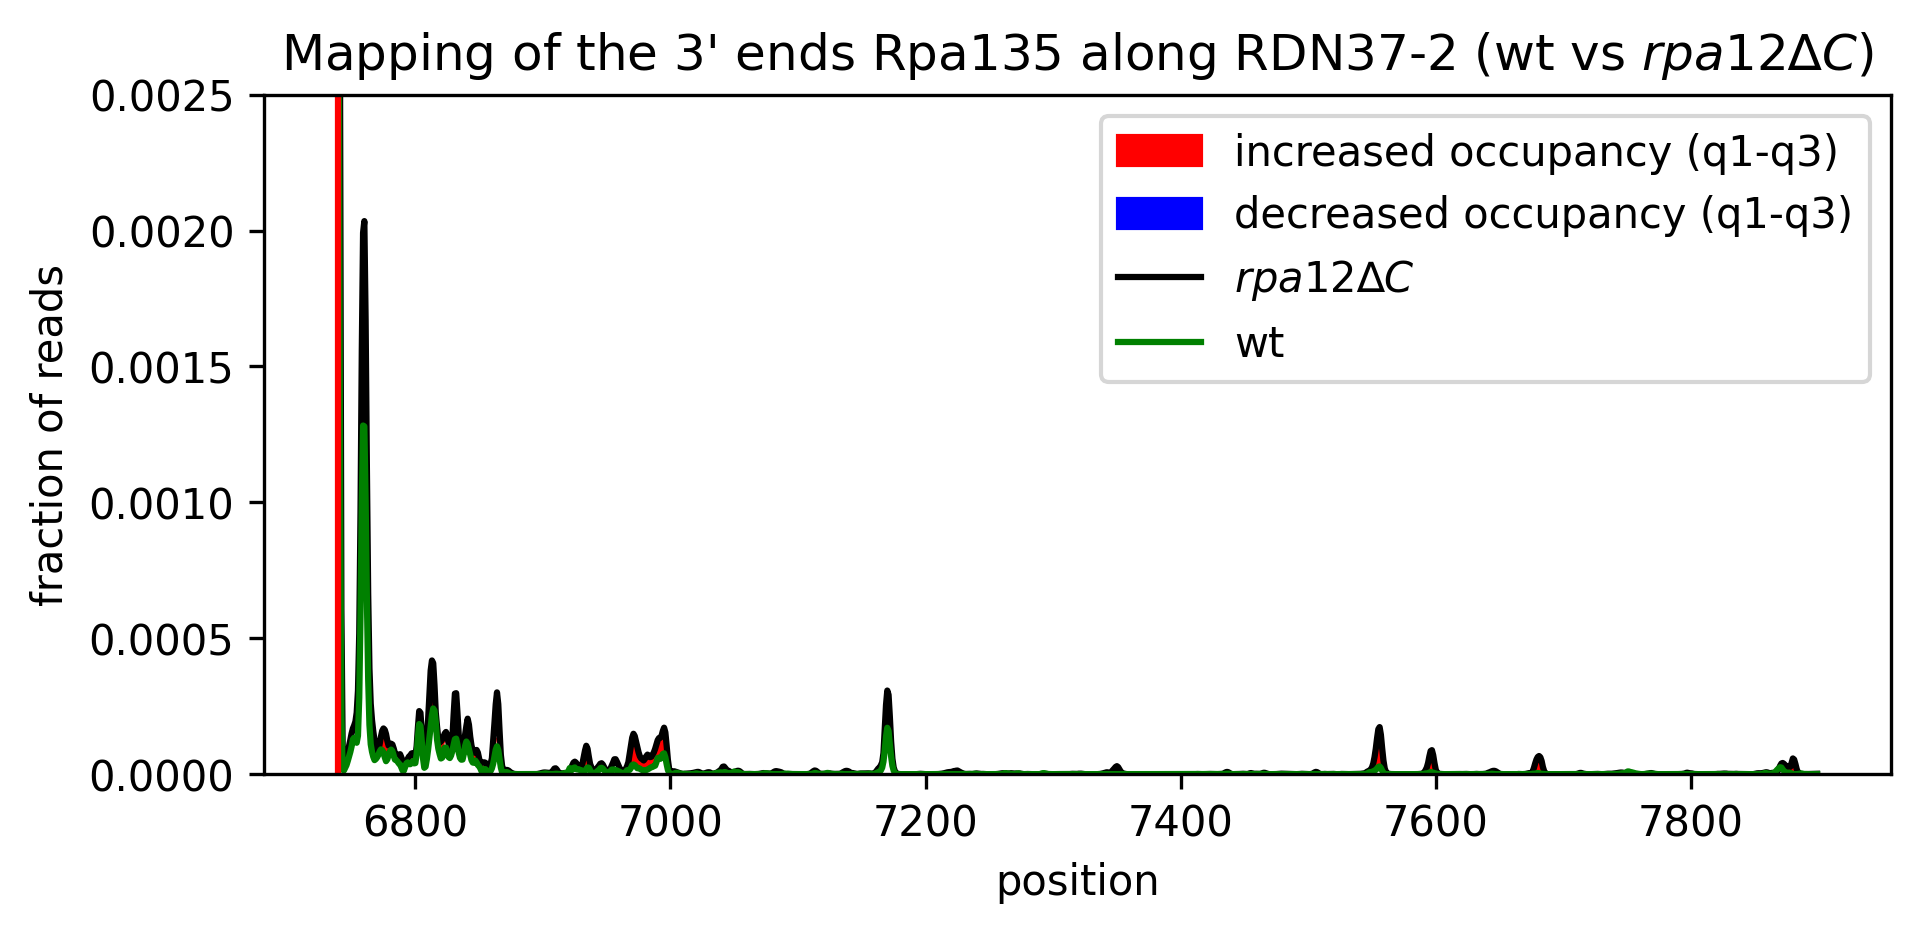

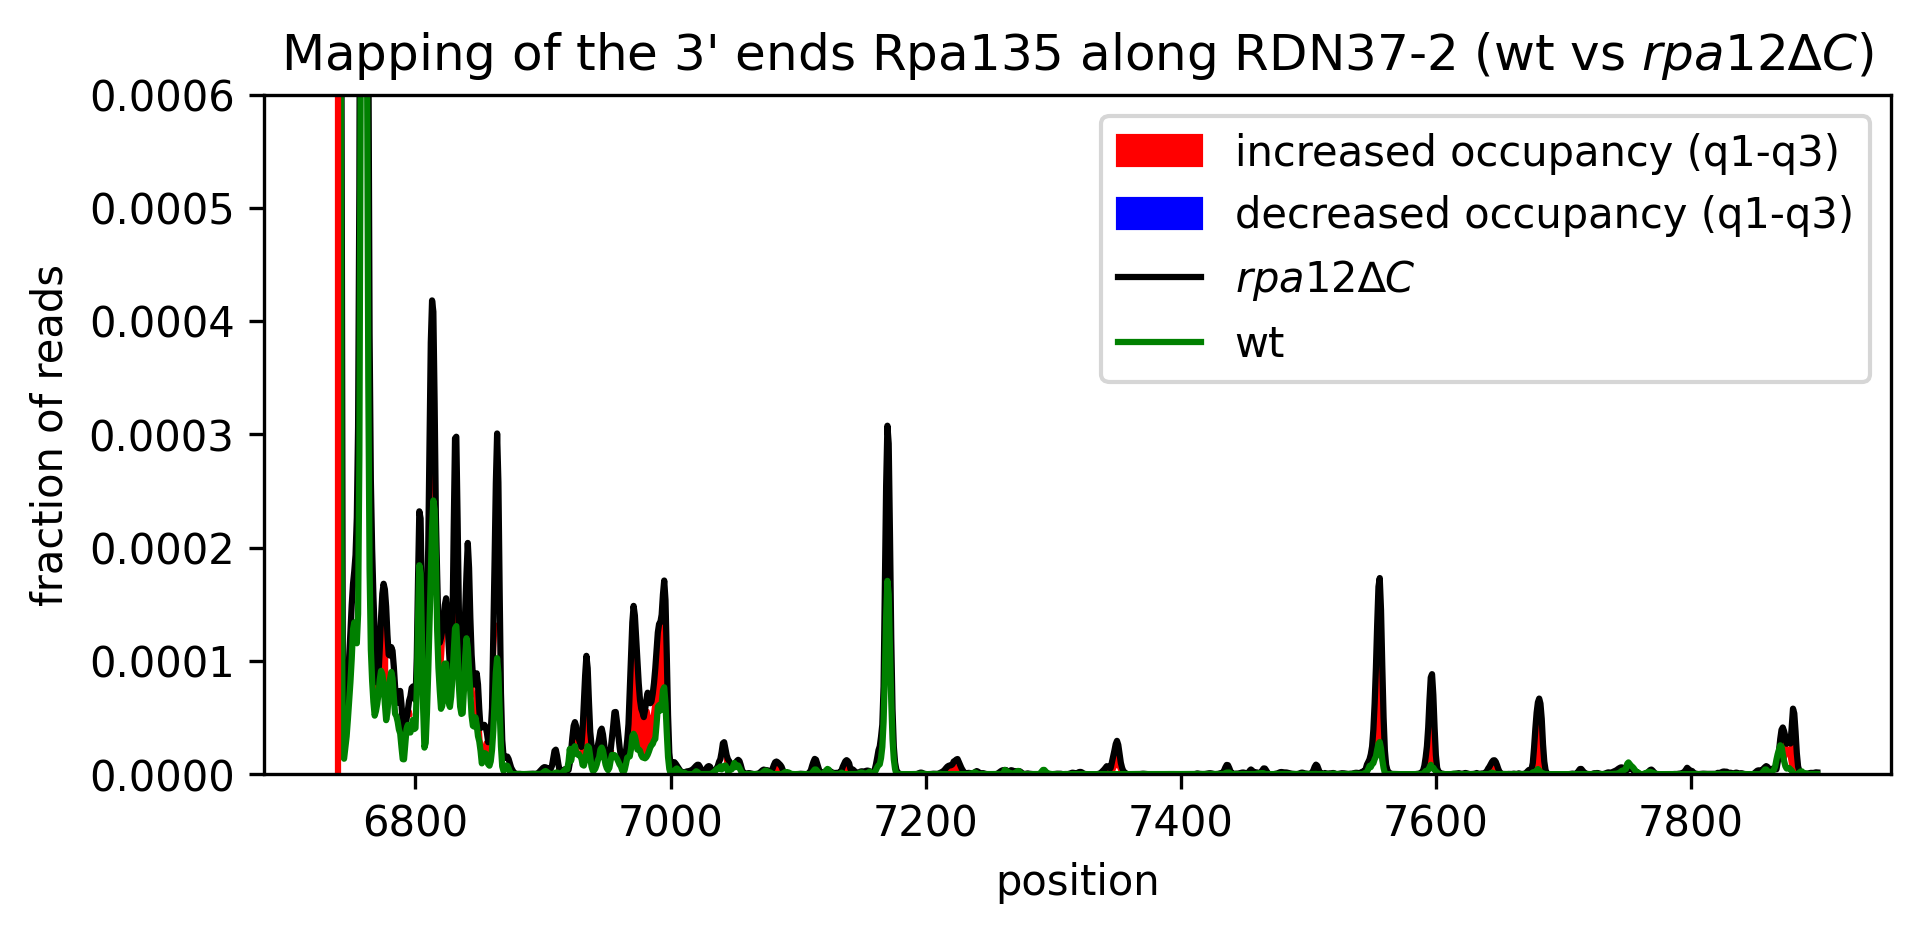

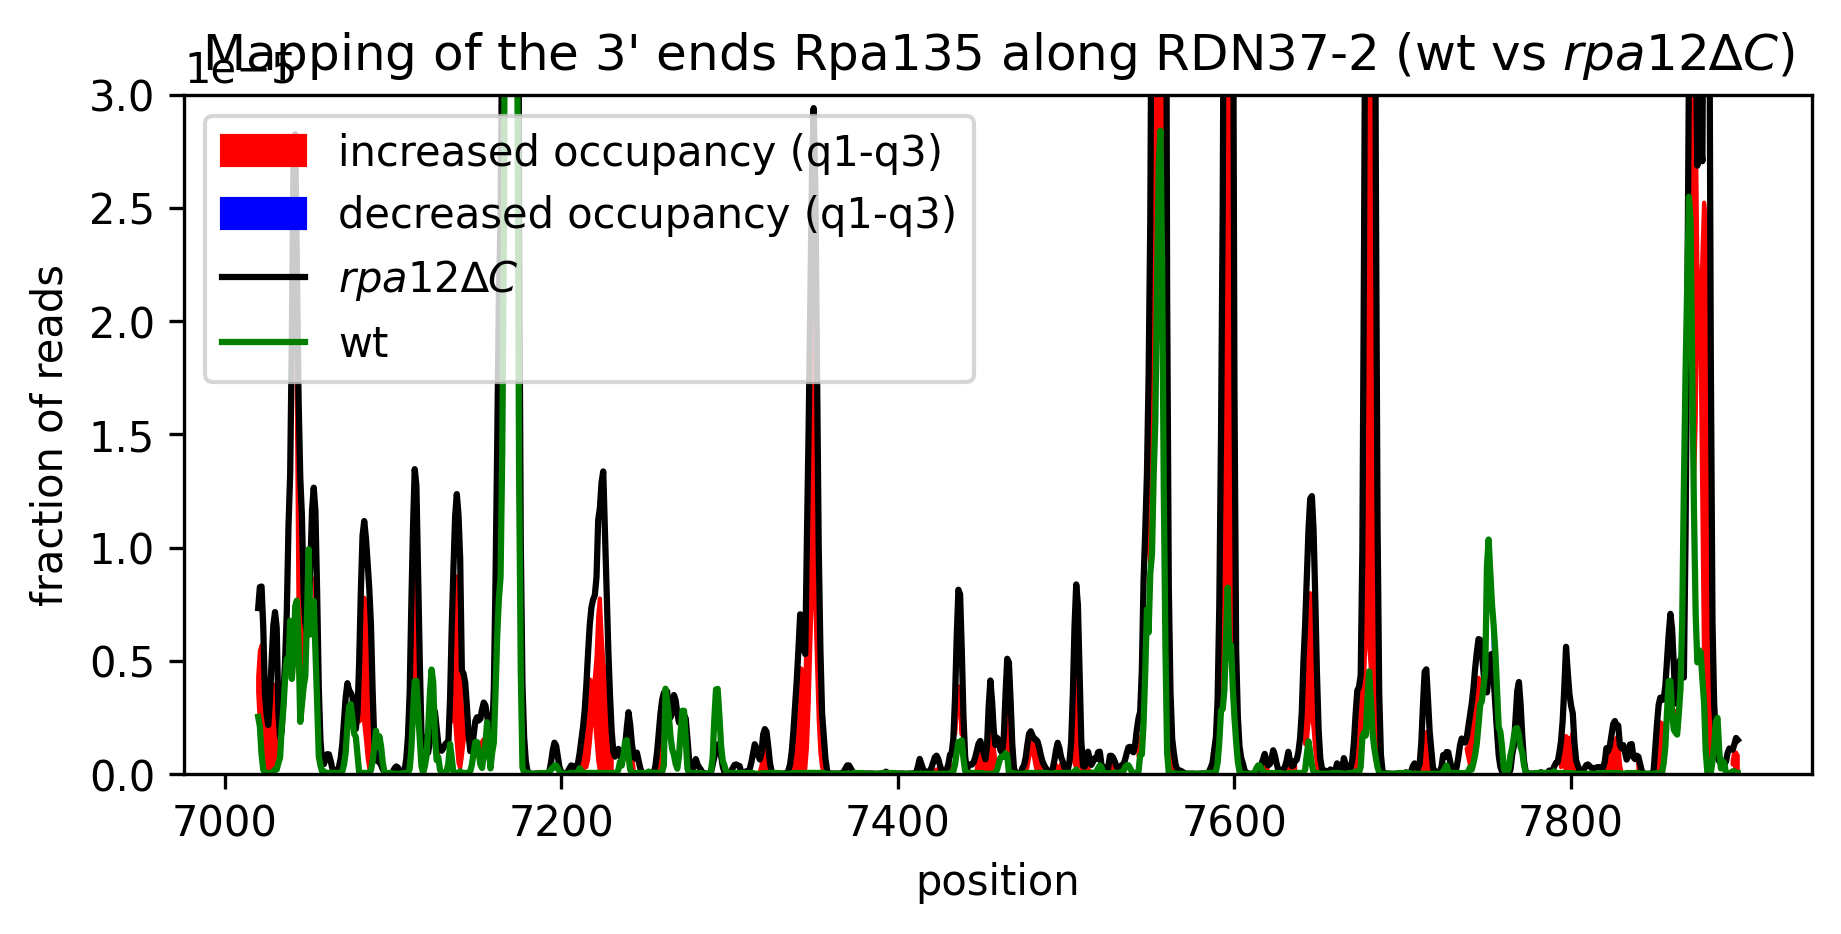

In [5]:
start=6739+1300
stop=7900+1300

def plot_diff2(ref, dataset=pd.DataFrame(), ranges='mm', label1="reference", label2="", 
              title="", start=None, stop=None, plot_medians=True, plot_ranges=True,plot_legend=True, log_yscale=False,
              dpi=150, figsize=(7, 3), ylim=(None,0.01), h_lines=list(),lc="red", offset=0,fname=None):
    '''Plot given dataset and reference, differences are marked

    :param ref: str with path to csv file or DataFrame
    :param dataset: DataFrame containing following columns:```['position'] ['mean'] ['median'] ['std']```
        optionally ```['nucleotide'] ['q1'] ['q3'] ['max'] ['min']```
    :param ranges: str "mm" : min-max or "qq" : q1-q3
    :param label: str
    :param start: int
    :param stop: int
    :param plot_medians: boolean if True plot medians, default True
    :param plot_ranges: boolean if True plot ranges, default True
    :param figsize: tuple, default (7,3)
    :param ylim: tuple OY axes lim, default (None,0.01)
    :param h_lines: list of horizontal lines
    :return:
    '''

    #handling reference plot
    if isinstance(ref, str):
        reference = pd.read_csv(ref, index_col=0)
    elif isinstance(ref, pd.DataFrame):
        reference = ref

    ranges_dict = {'mm': 'min-max', 'qq': 'q1-q3'}

    if isinstance(reference, str):
        reference = pd.read_csv(reference, index_col=0)

    differences_df = tt.profiles.compareMoretoRef(dataset=dataset, ranges=ranges, ref=reference)[start:stop]
    dataset, s2 = dataset[start:stop], reference[start:stop]  # prepating datasets
    # plotting
    fig, ax1 = plt.subplots(figsize=figsize,dpi=dpi)
    ax1.fill_between(differences_df.index-offset, differences_df['ear_min'], differences_df['ear_max'], color='red',
                     where=(differences_df['ear_max'] > 0), label='increased occupancy (' + ranges_dict[ranges] + ')')
    ax1.fill_between(differences_df.index-offset, differences_df['rae_min'], differences_df['rae_max'], color='blue',
                     where=(differences_df['rae_max'] > 0), label='decreased occupancy (' + ranges_dict[ranges] + ')')
    if plot_medians == True:
        ax1.plot(dataset.index-offset, dataset['median'], 'black', label=label2)
        ax1.plot(s2.index-offset, s2['median'], 'green', label=label1)
    if plot_ranges == True:
        if len(dataset.columns) == 4:  # if only two experiments
            ax1.fill_between(dataset.index-offset, dataset['min'], dataset['max'], color='black', alpha=0.3, label='min-max')
        else:  # if more than two experiments
            ax1.fill_between(dataset.index-offset, dataset['q1'], dataset['q3'], color='black', alpha=0.2, label='q1-q3')
            ax1.fill_between(dataset.index-offset, dataset['min'], dataset['max'], color='black', alpha=0.07, label='min=max')
        ax1.fill_between(s2.index-offset, s2['q1'], s2['q3'], color='green', alpha=0.2, label='q1-q3')
        ax1.fill_between(s2.index-offset, s2['min'], s2['max'], color='green', alpha=0.07, label='min=max')
    ax1.set_ylim(ylim)
    ax1.set_xlabel('position')
    ax1.set_ylabel('fraction of reads', color='black')
    for i in [i for i in h_lines if i in range(start-offset, stop-offset)]: ax1.axvline(i, color=lc)
    ax1.set_title(title)
    if plot_legend==True: plt.legend()
    if log_yscale==True: plt.yscale('log')
    plt.title(title)

    if fname:
        plt.savefig(fname=fname,dpi=dpi,format='png',bbox_inches='tight')
    else:
        plt.show()

plot_diff2(ref=df11_Rpa135_wt_3end, dataset=df12_Rpa135_rpa12d_3end,figsize=(7,3),label1="wt",label2="$\it{rpa12∆C}$",
                           title="Mapping of the 3' ends Rpa135 along RDN37-2 (wt vs $\it{rpa12∆C}$)",plot_ranges=False,
                           dpi=300,offset=1300, ylim=(0,0.0025),ranges='qq',
                           h_lines=[i-300 for i in cleavage_sites.values()],
                           start=start, stop=stop, fname='Fig_2E.png')

tt.plotting.plot_diff(ref=df11_Rpa135_wt_3end, dataset=df12_Rpa135_rpa12d_3end,figsize=(7,3),label1="wt",label2="$\it{rpa12∆C}$",
                           title="Mapping of the 3' ends Rpa135 along RDN37-2 (wt vs $\it{rpa12∆C}$)",plot_ranges=False,
                           dpi=300,offset=1300, ylim=(0,0.0006),ranges='qq',
                           h_lines=[i-300 for i in cleavage_sites.values()],
                           start=start, stop=stop, fname='Fig_2Ev2.png')

tt.plotting.plot_diff(ref=df11_Rpa135_wt_3end, dataset=df12_Rpa135_rpa12d_3end,figsize=(7,3),label1="wt",label2="$\it{rpa12∆C}$",
                           title="Mapping of the 3' ends Rpa135 along RDN37-2 (wt vs $\it{rpa12∆C}$)",plot_ranges=False,
                           dpi=300,offset=1300, ylim=(0,0.00003),ranges='qq',
                           h_lines=[i-300 for i in cleavage_sites.values()],
                           start=1300+7020, stop=stop, fname='Fig_S2D.png')

/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_min'][differences_df['ref_above_exp'] > 0] = differences_df['exp_max']
/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:416: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_max'][differences_df['ref_above_exp'] > 0] = differences_df['ref_min']
/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in t

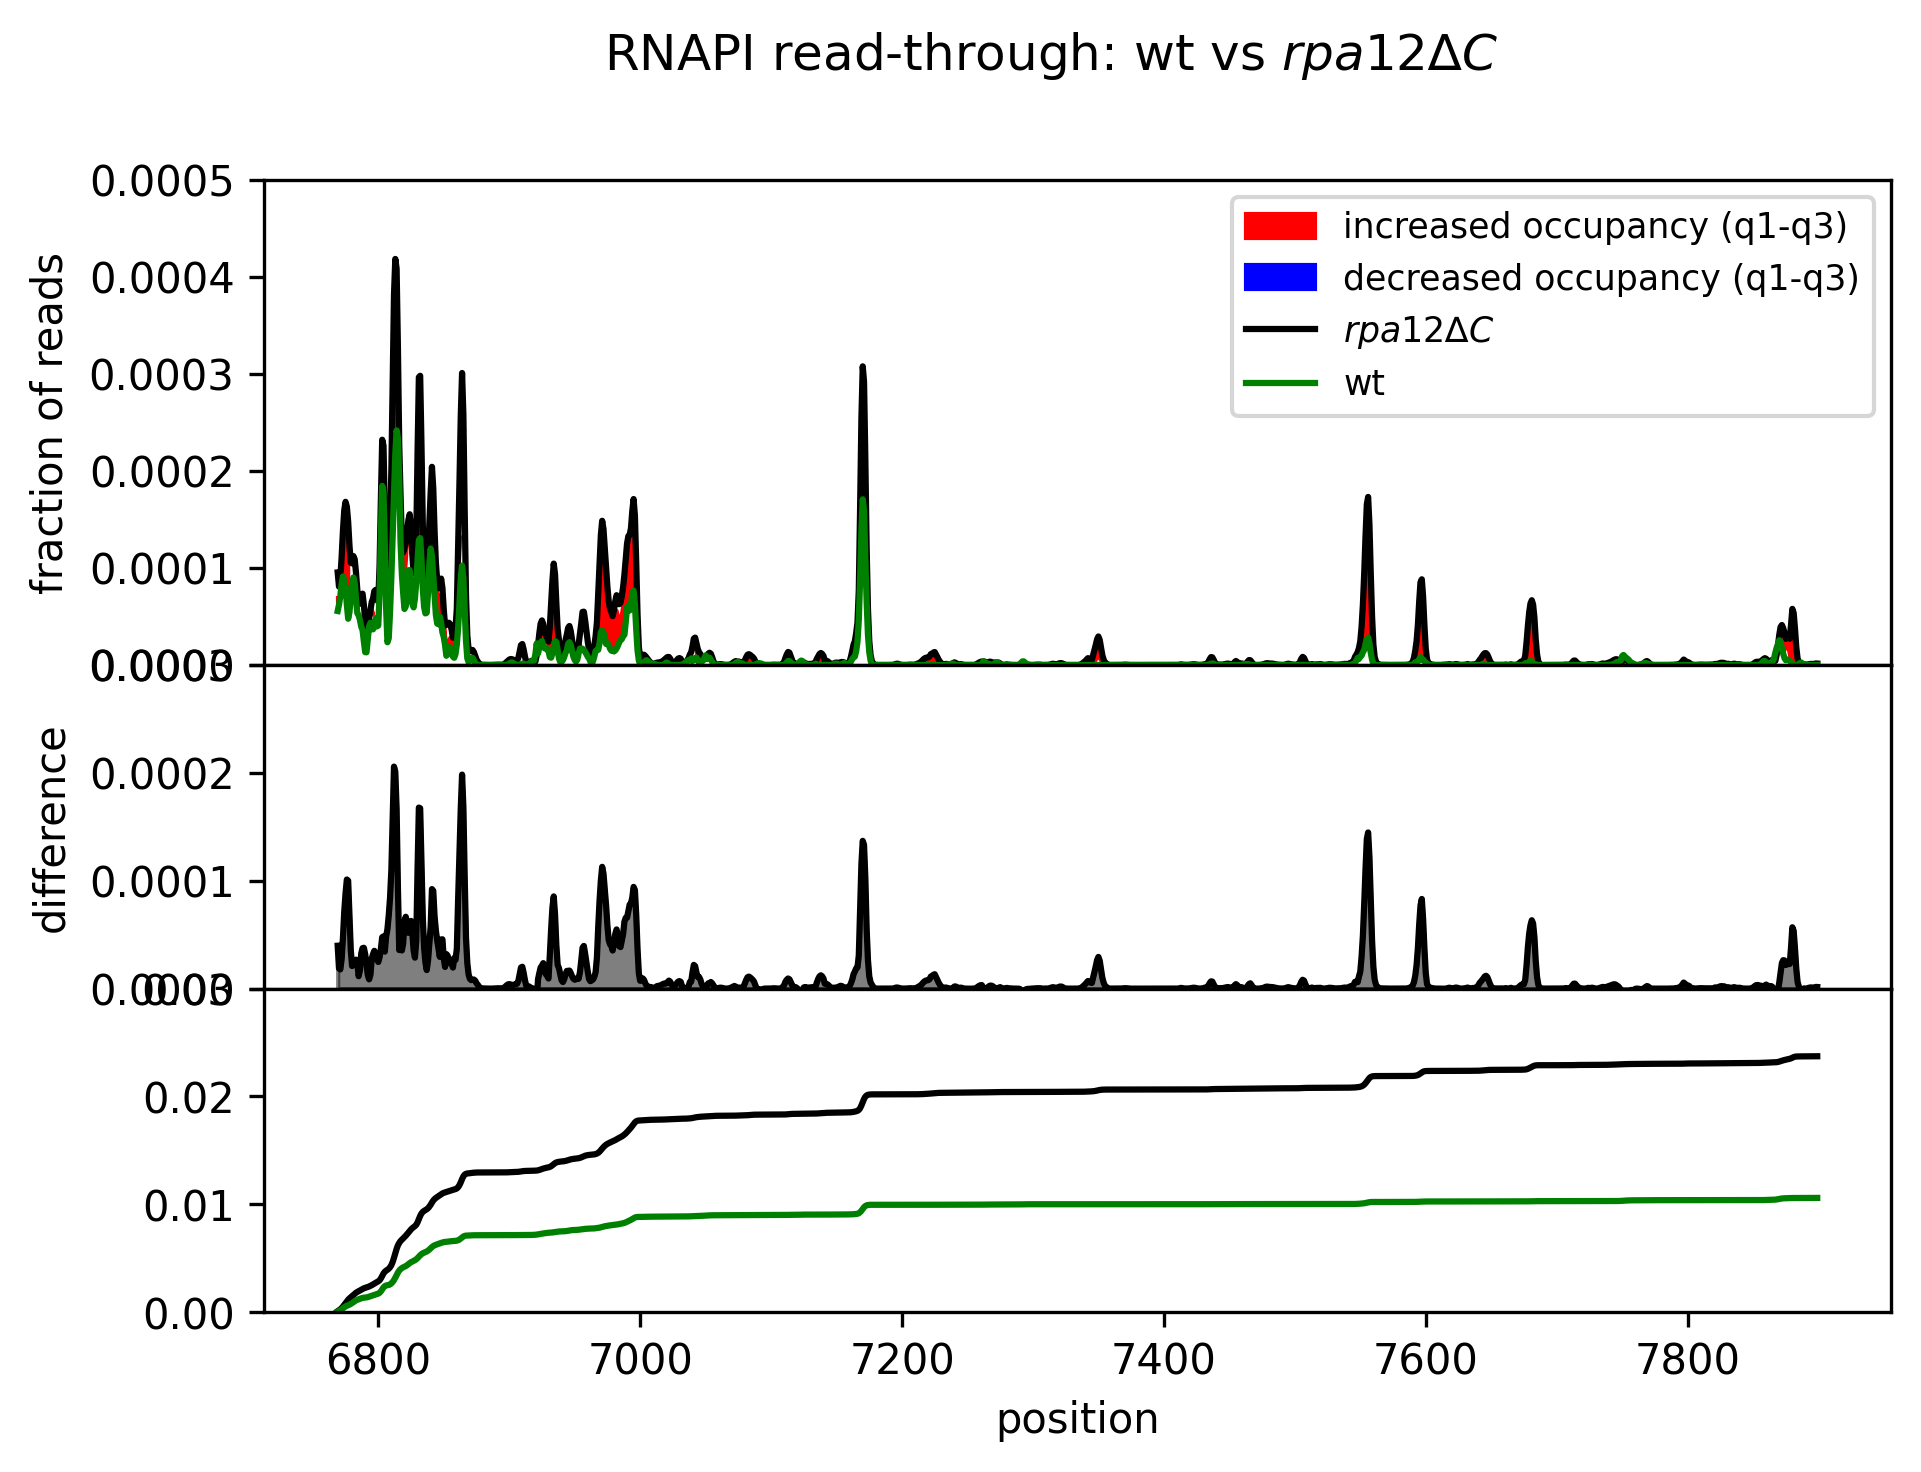

In [5]:
start=6739+30+1300
stop=7900+1300

def plot_diff3(ref, dataset=pd.DataFrame(), ranges='mm', label1="reference", label2="", 
              title="", start=None, stop=None, plot_medians=True, plot_ranges=True,plot_legend=True, log_yscale=False,
              dpi=150, figsize=(7,9), ylim=(None,0.01), h_lines=list(),lc="red", offset=0,fname=None):
    '''Plot given dataset and reference, differences are marked

    :param ref: str with path to csv file or DataFrame
    :param dataset: DataFrame containing following columns:```['position'] ['mean'] ['median'] ['std']```
        optionally ```['nucleotide'] ['q1'] ['q3'] ['max'] ['min']```
    :param ranges: str "mm" : min-max or "qq" : q1-q3
    :param label: str
    :param start: int
    :param stop: int
    :param plot_medians: boolean if True plot medians, default True
    :param plot_ranges: boolean if True plot ranges, default True
    :param figsize: tuple, default (7,3)
    :param ylim: tuple OY axes lim, default (None,0.01)
    :param h_lines: list of horizontal lines
    :return:
    '''

    #handling reference plot
    if isinstance(ref, str):
        reference = pd.read_csv(ref, index_col=0)
    elif isinstance(ref, pd.DataFrame):
        reference = ref

    ranges_dict = {'mm': 'min-max', 'qq': 'q1-q3'}

    if isinstance(reference, str):
        reference = pd.read_csv(reference, index_col=0)

    differences_df = tt.profiles.compareMoretoRef(dataset=dataset, ranges=ranges, ref=reference)[start:stop]
    dataset['diff'] = dataset['median']-ref['median']
    dataset['zeros'] = 0
    dataset['cumsum'] = dataset['median'].cumsum()
    ref['cumsum'] = ref['median'].cumsum()
    dataset, s2 = dataset[start:stop], reference[start:stop]  # prepating datasets
    # plotting
    fig, (ax1,ax2, ax3) = plt.subplots(3,sharex=True, figsize=figsize,dpi=dpi,gridspec_kw={'height_ratios': [3, 2, 2]})
    fig.suptitle(title)
    fig.subplots_adjust(hspace=0)
   
    #ax1
    ax1.fill_between(differences_df.index-offset, differences_df['ear_min'], differences_df['ear_max'], color='red',
                     where=(differences_df['ear_max'] > 0), label='increased occupancy (' + ranges_dict[ranges] + ')')
    ax1.fill_between(differences_df.index-offset, differences_df['rae_min'], differences_df['rae_max'], color='blue',
                     where=(differences_df['rae_max'] > 0), label='decreased occupancy (' + ranges_dict[ranges] + ')')
    if plot_medians == True:
        ax1.plot(dataset.index-offset, dataset['median'], 'black', label=label2)
        ax1.plot(s2.index-offset, s2['median'], 'green', label=label1)
    if plot_ranges == True:
        if len(dataset.columns) == 4:  # if only two experiments
            ax1.fill_between(dataset.index-offset, dataset['min'], dataset['max'], color='black', alpha=0.3, label='min-max')
        else:  # if more than two experiments
            ax1.fill_between(dataset.index-offset, dataset['q1'], dataset['q3'], color='black', alpha=0.2, label='q1-q3')
            ax1.fill_between(dataset.index-offset, dataset['min'], dataset['max'], color='black', alpha=0.07, label='min=max')
        ax1.fill_between(s2.index-offset, s2['q1'], s2['q3'], color='green', alpha=0.2, label='q1-q3')
        ax1.fill_between(s2.index-offset, s2['min'], s2['max'], color='green', alpha=0.07, label='min=max')
    ax1.set_ylim(ylim)
    
    ax1.set_ylabel('fraction of reads', color='black')
    for i in [i for i in h_lines if i in range(start-offset, stop-offset)]: ax1.axvline(i, color=lc)
    ax1.legend(fontsize='small')
    
    #ax2
    ax2.plot(dataset.index-offset, dataset['diff'], 'black')
    ax2.fill_between(dataset.index-offset, dataset['zeros'], dataset['diff'], color='black', alpha=0.5)
    ax2.set_ylim(0,0.0003)
    ax2.set_ylabel('difference', color='black')
    
    #ax3
    ax3.plot(dataset.index-offset, dataset['median'].cumsum(), 'black', label=label2)
    ax3.plot(s2.index-offset, s2['median'].cumsum(), 'green', label=label1)
    ax3.set_xlabel('position')
    ax3.set_ylim(0,0.03)
#     ax3.set_ylabel('cumulative sum', color='black')
    
    
    
    if fname:
        plt.savefig(fname=fname,dpi=dpi,format='png',bbox_inches='tight')
    else:
        plt.show()

plot_diff3(ref=df11_Rpa135_wt_3end, dataset=df12_Rpa135_rpa12d_3end,figsize=(7,5),label1="wt",label2="$\it{rpa12∆C}$",
                           title="RNAPI read-through: wt vs $\it{rpa12∆C}$",plot_ranges=False,
                           dpi=300,offset=1300, ylim=(0,0.0005),ranges='qq', log_yscale=True,
                           h_lines=[i-300 for i in cleavage_sites.values()],
                           start=start, stop=stop, fname='Fig_2G.png')

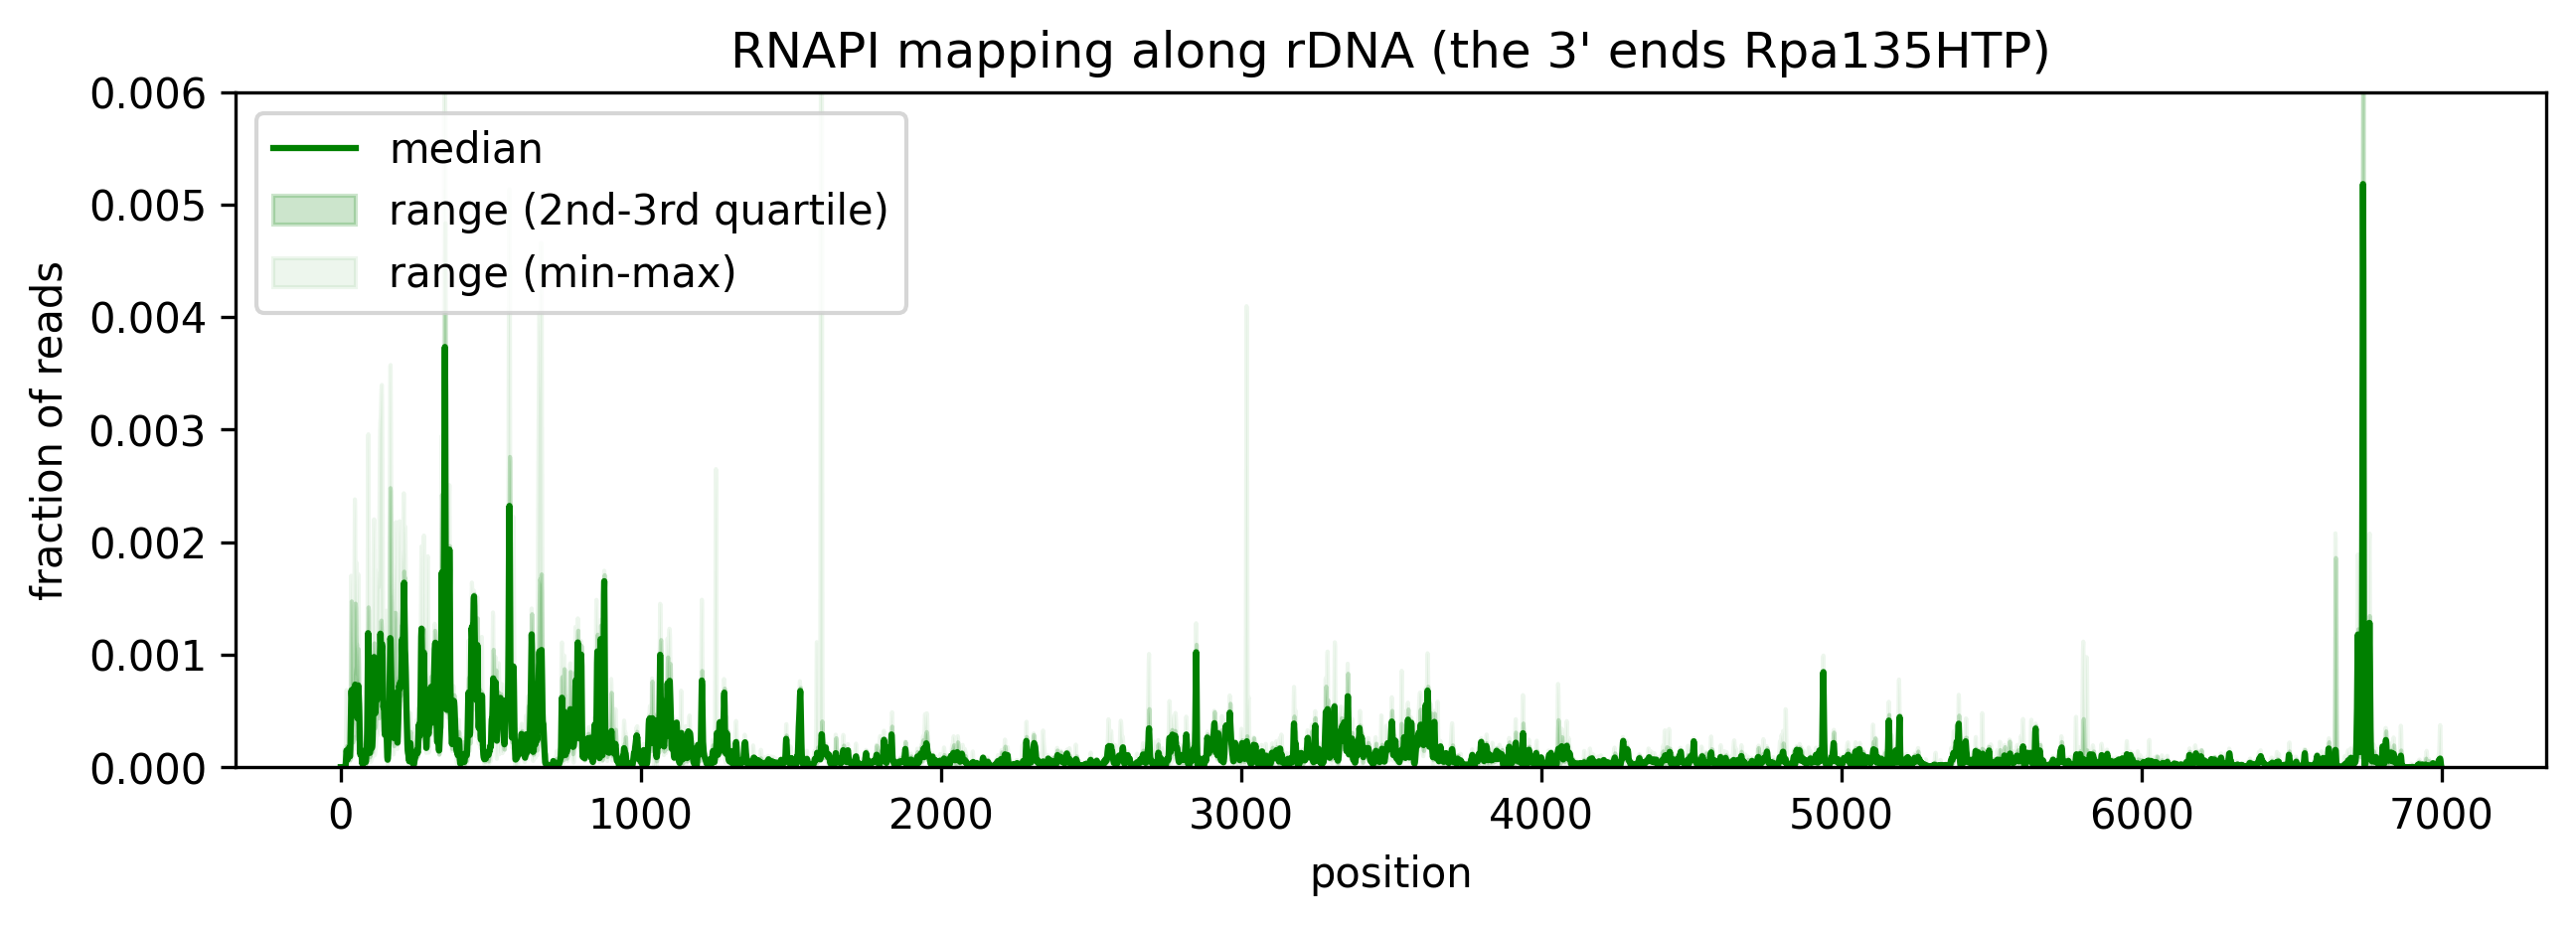

In [6]:
start=0+1300
stop=7000+1300

tt.plotting.plot_as_box_plot(df11_Rpa135_wt_3end, figsize=(10,3), title="RNAPI mapping along rDNA (the 3' ends Rpa135HTP)",
                             start=start,stop=stop,
                             dpi=300,ylim=(None,0.006),offset=1300, fname="Fig_S2C.png")

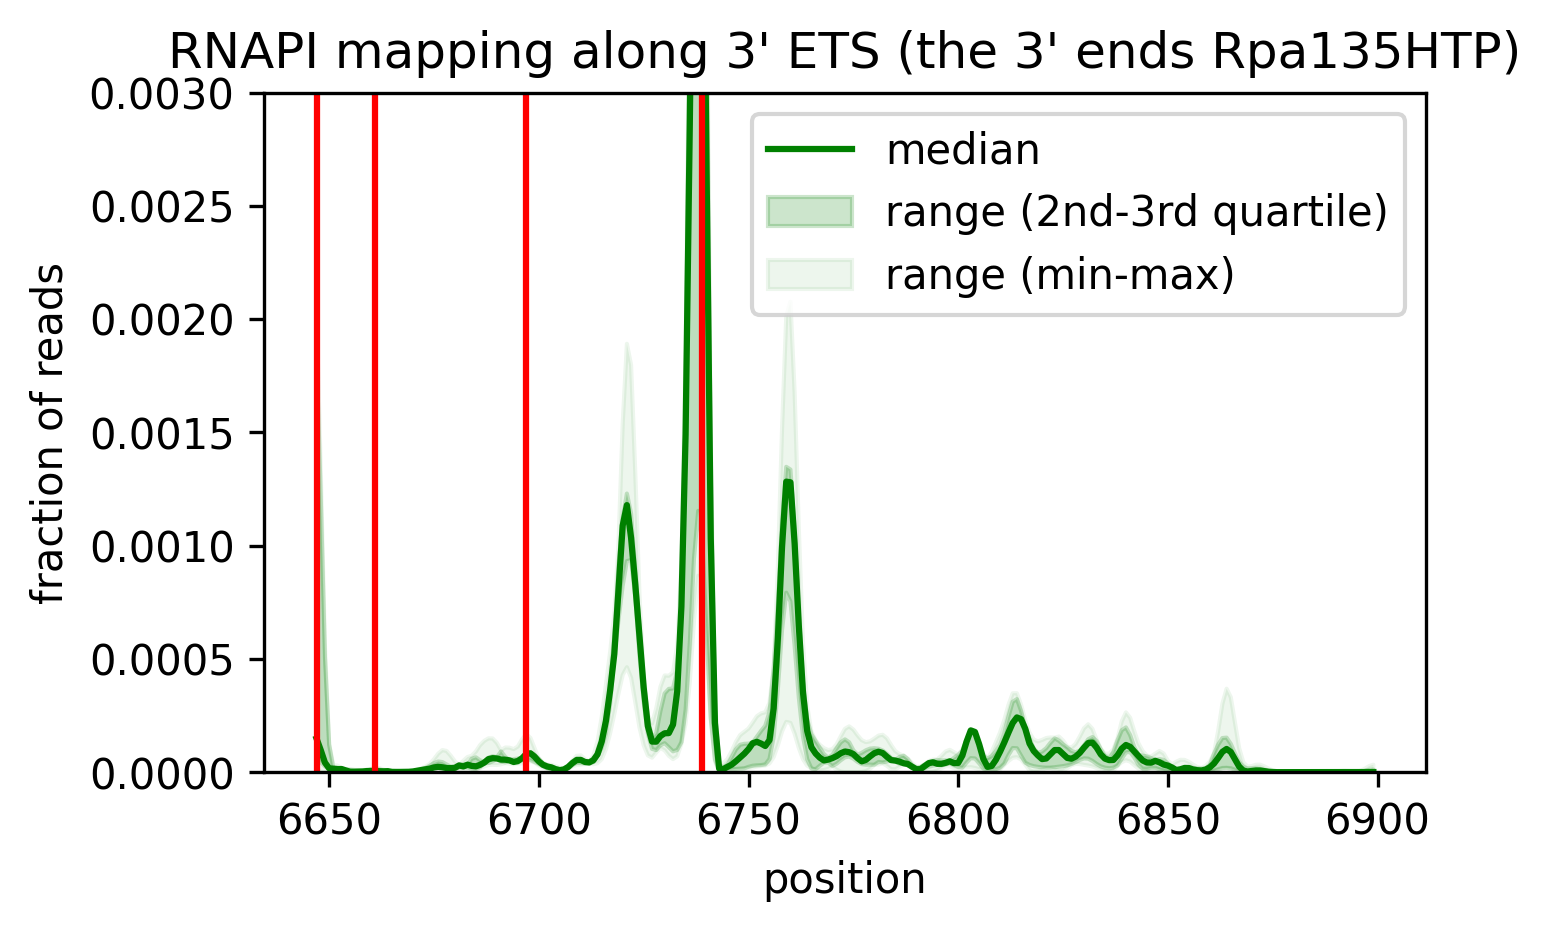

In [7]:
start=6647+1300
stop=6900+1300

tt.plotting.plot_as_box_plot(df11_Rpa135_wt_3end, figsize=(5,3), title="RNAPI mapping along 3' ETS (the 3' ends Rpa135HTP)",
                             start=start,stop=stop,h_lines=[i-300 for i in cleavage_sites.values()],
                             dpi=300,ylim=(None,0.003),offset=1300, fname='Fig_S2E.png')

/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_min'][differences_df['ref_above_exp'] > 0] = differences_df['exp_max']
/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:416: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_max'][differences_df['ref_above_exp'] > 0] = differences_df['ref_min']
/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in t

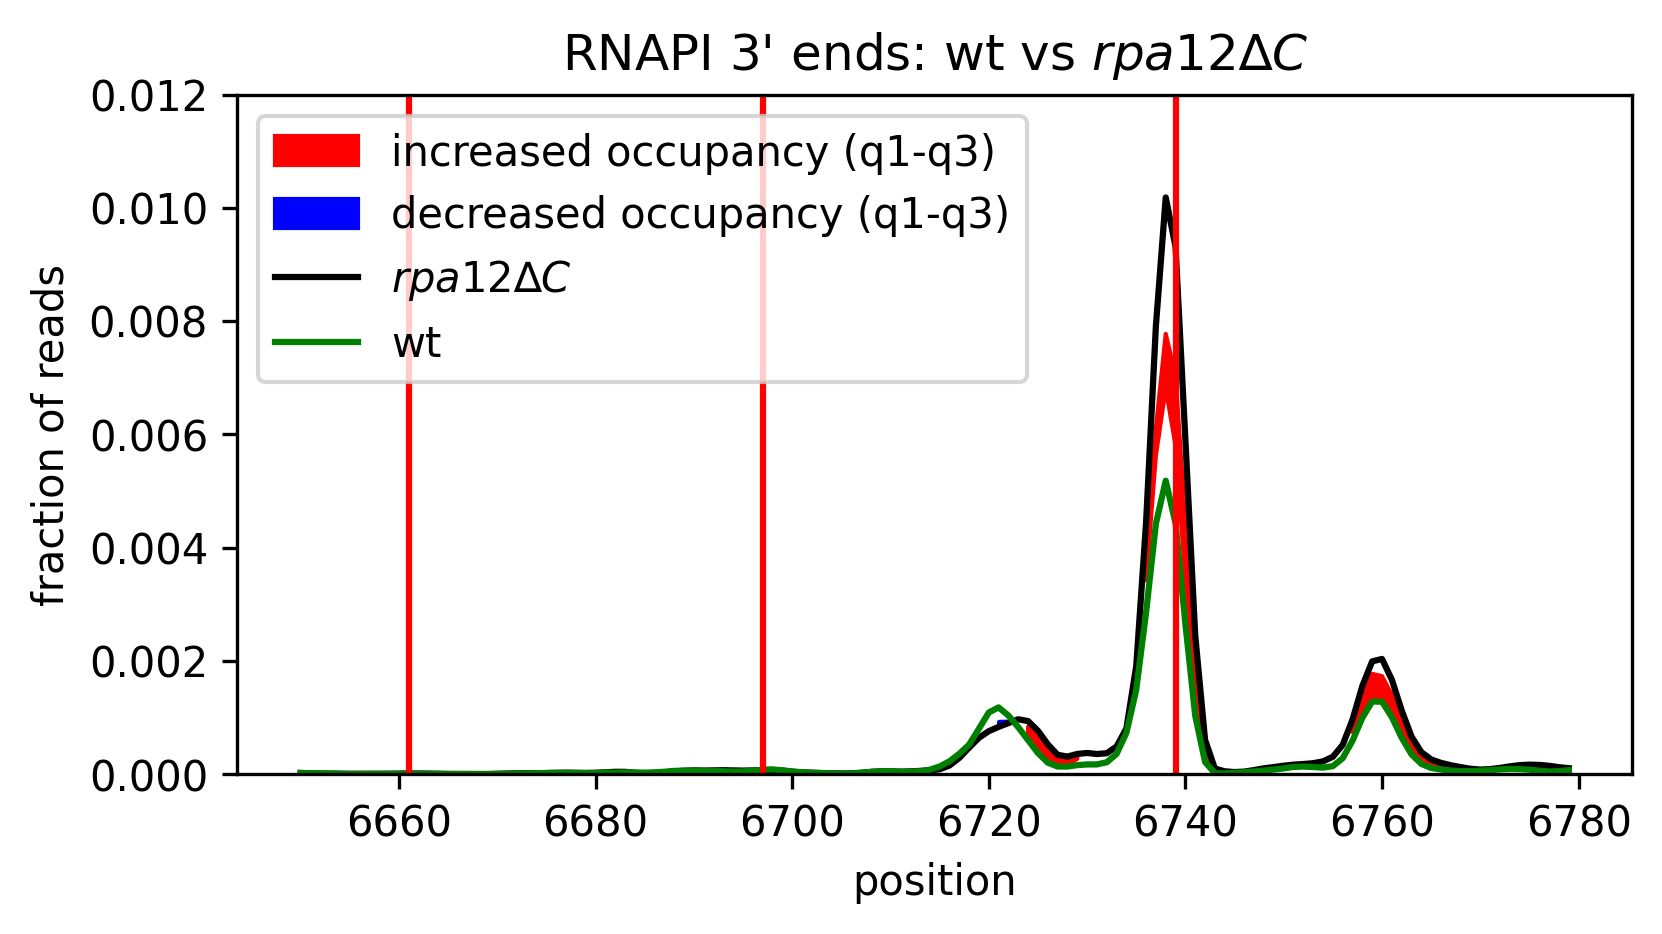

In [8]:
start=6650+1300
stop=6780+1300

tt.plotting.plot_diff(ref=df11_Rpa135_wt_3end, dataset=df12_Rpa135_rpa12d_3end,figsize=(6,3),label1="wt",label2="$\it{rpa12∆C}$",
                           title="RNAPI 3' ends: wt vs $\it{rpa12∆C}$",plot_ranges=False,
                           dpi=300,offset=1300, ylim=(0,0.012),ranges='qq',
                           h_lines=[i-300 for i in cleavage_sites.values()],
                           start=start, stop=stop,fname='Fig_S2F_v2.png')

/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_min'][differences_df['ref_above_exp'] > 0] = differences_df['exp_max']
/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:416: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_max'][differences_df['ref_above_exp'] > 0] = differences_df['ref_min']
/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in t

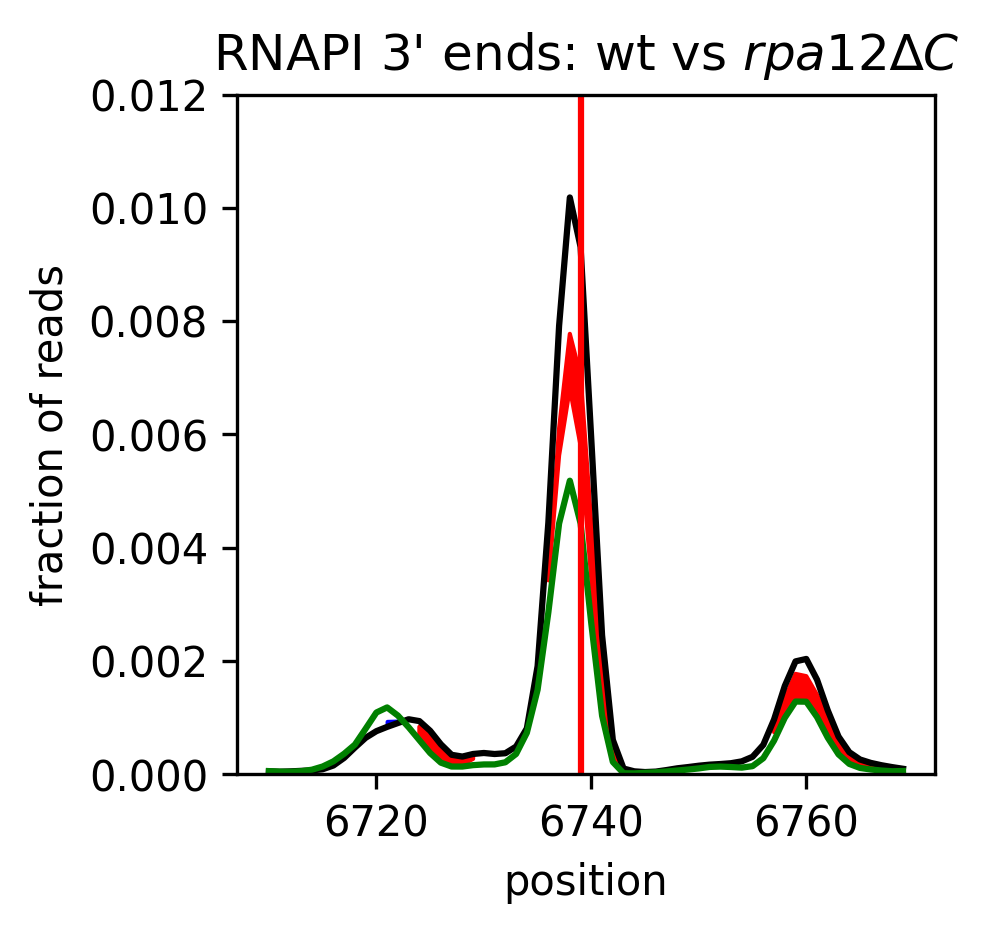

In [9]:
start=6710+1300
stop=6770+1300
       
plot_diff2(ref=df11_Rpa135_wt_3end, dataset=df12_Rpa135_rpa12d_3end,figsize=(3,3),label1="wt",label2="$\it{rpa12∆C}$",
                           title="RNAPI 3' ends: wt vs $\it{rpa12∆C}$",plot_ranges=False, plot_legend=False,
                           dpi=300,offset=1300, ylim=(0,0.012),ranges='qq',
                           h_lines=[i-300 for i in cleavage_sites.values()],
                           start=start, stop=stop,fname='Fig_S2F_v1.png')

/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_min'][differences_df['ref_above_exp'] > 0] = differences_df['exp_max']
/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:416: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_max'][differences_df['ref_above_exp'] > 0] = differences_df['ref_min']
/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in t

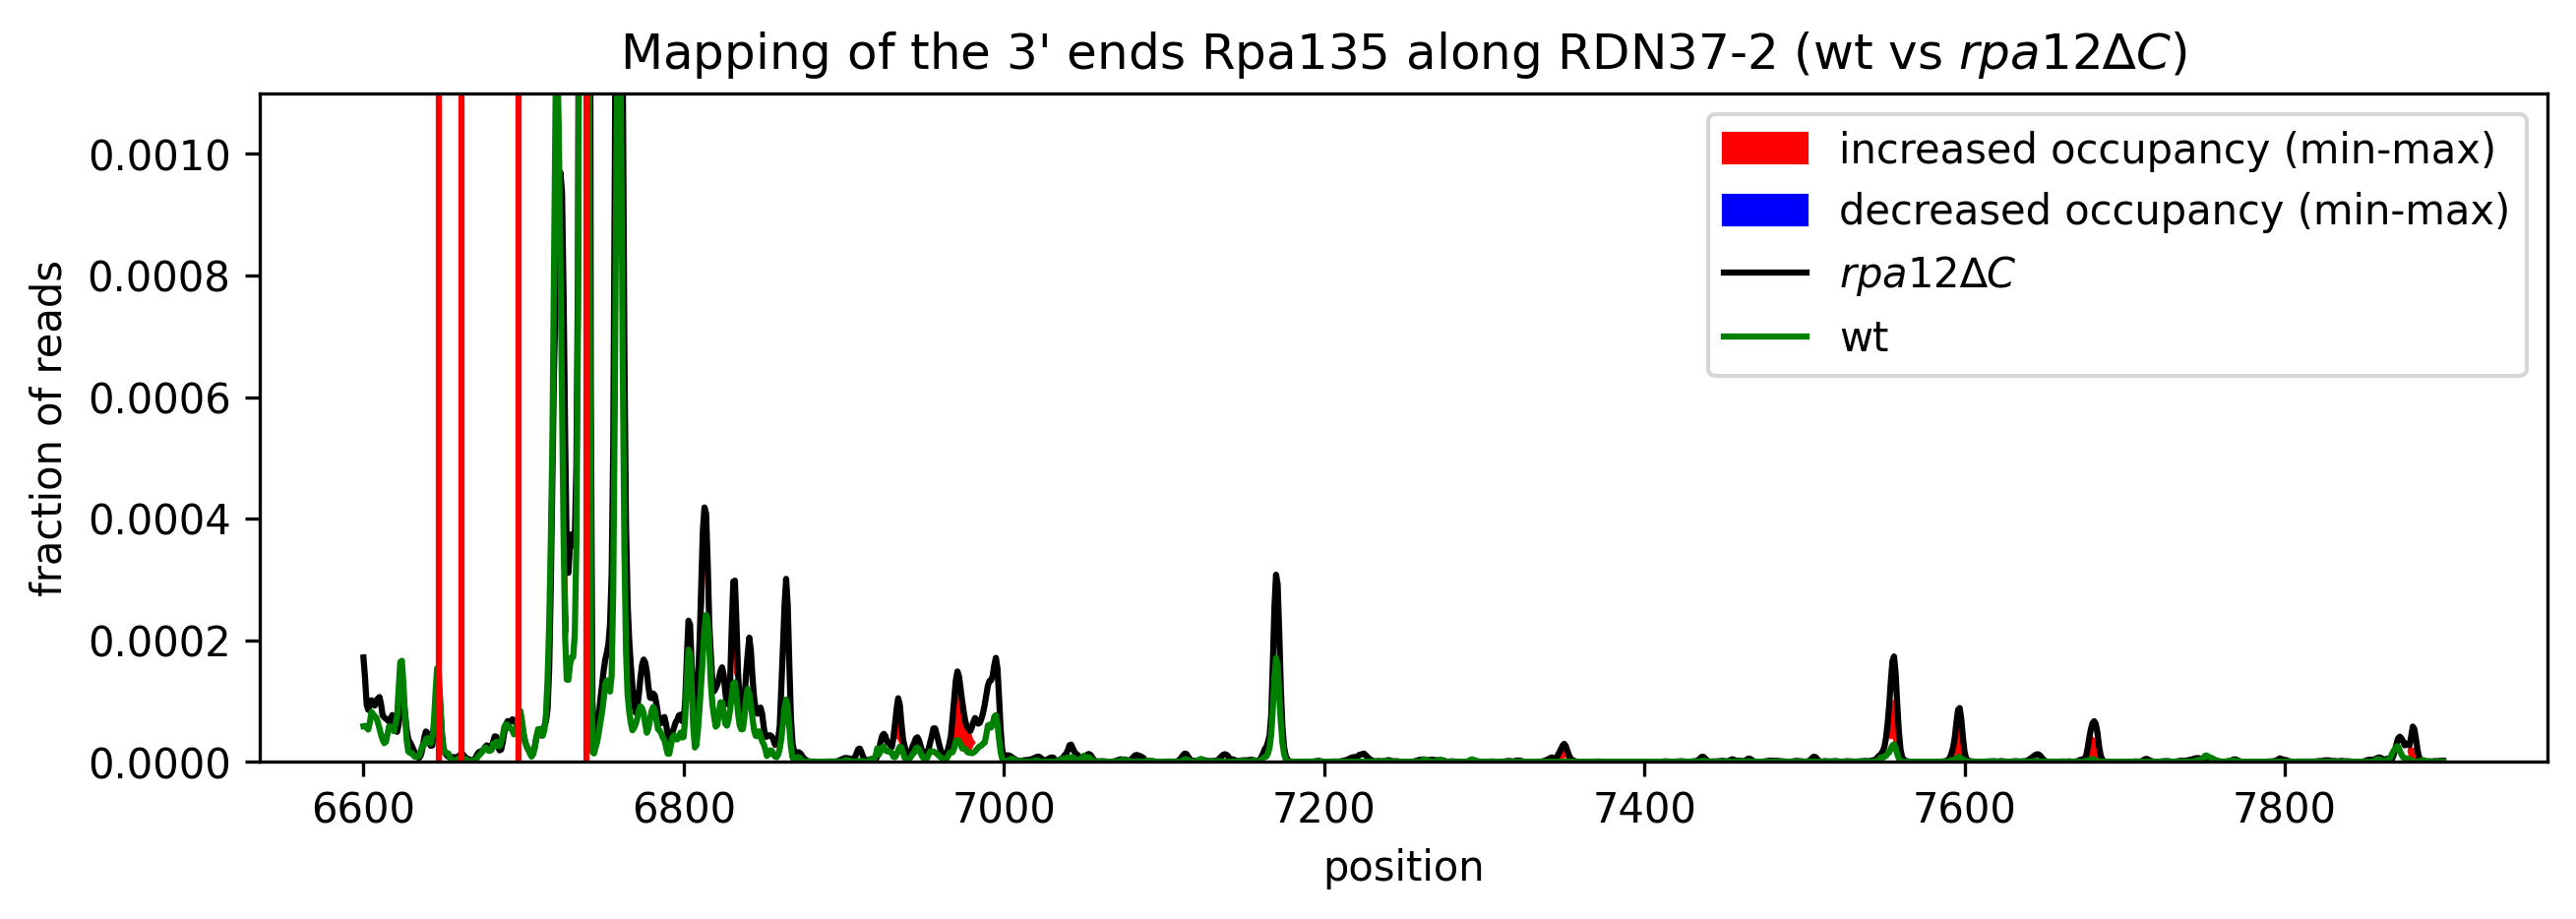

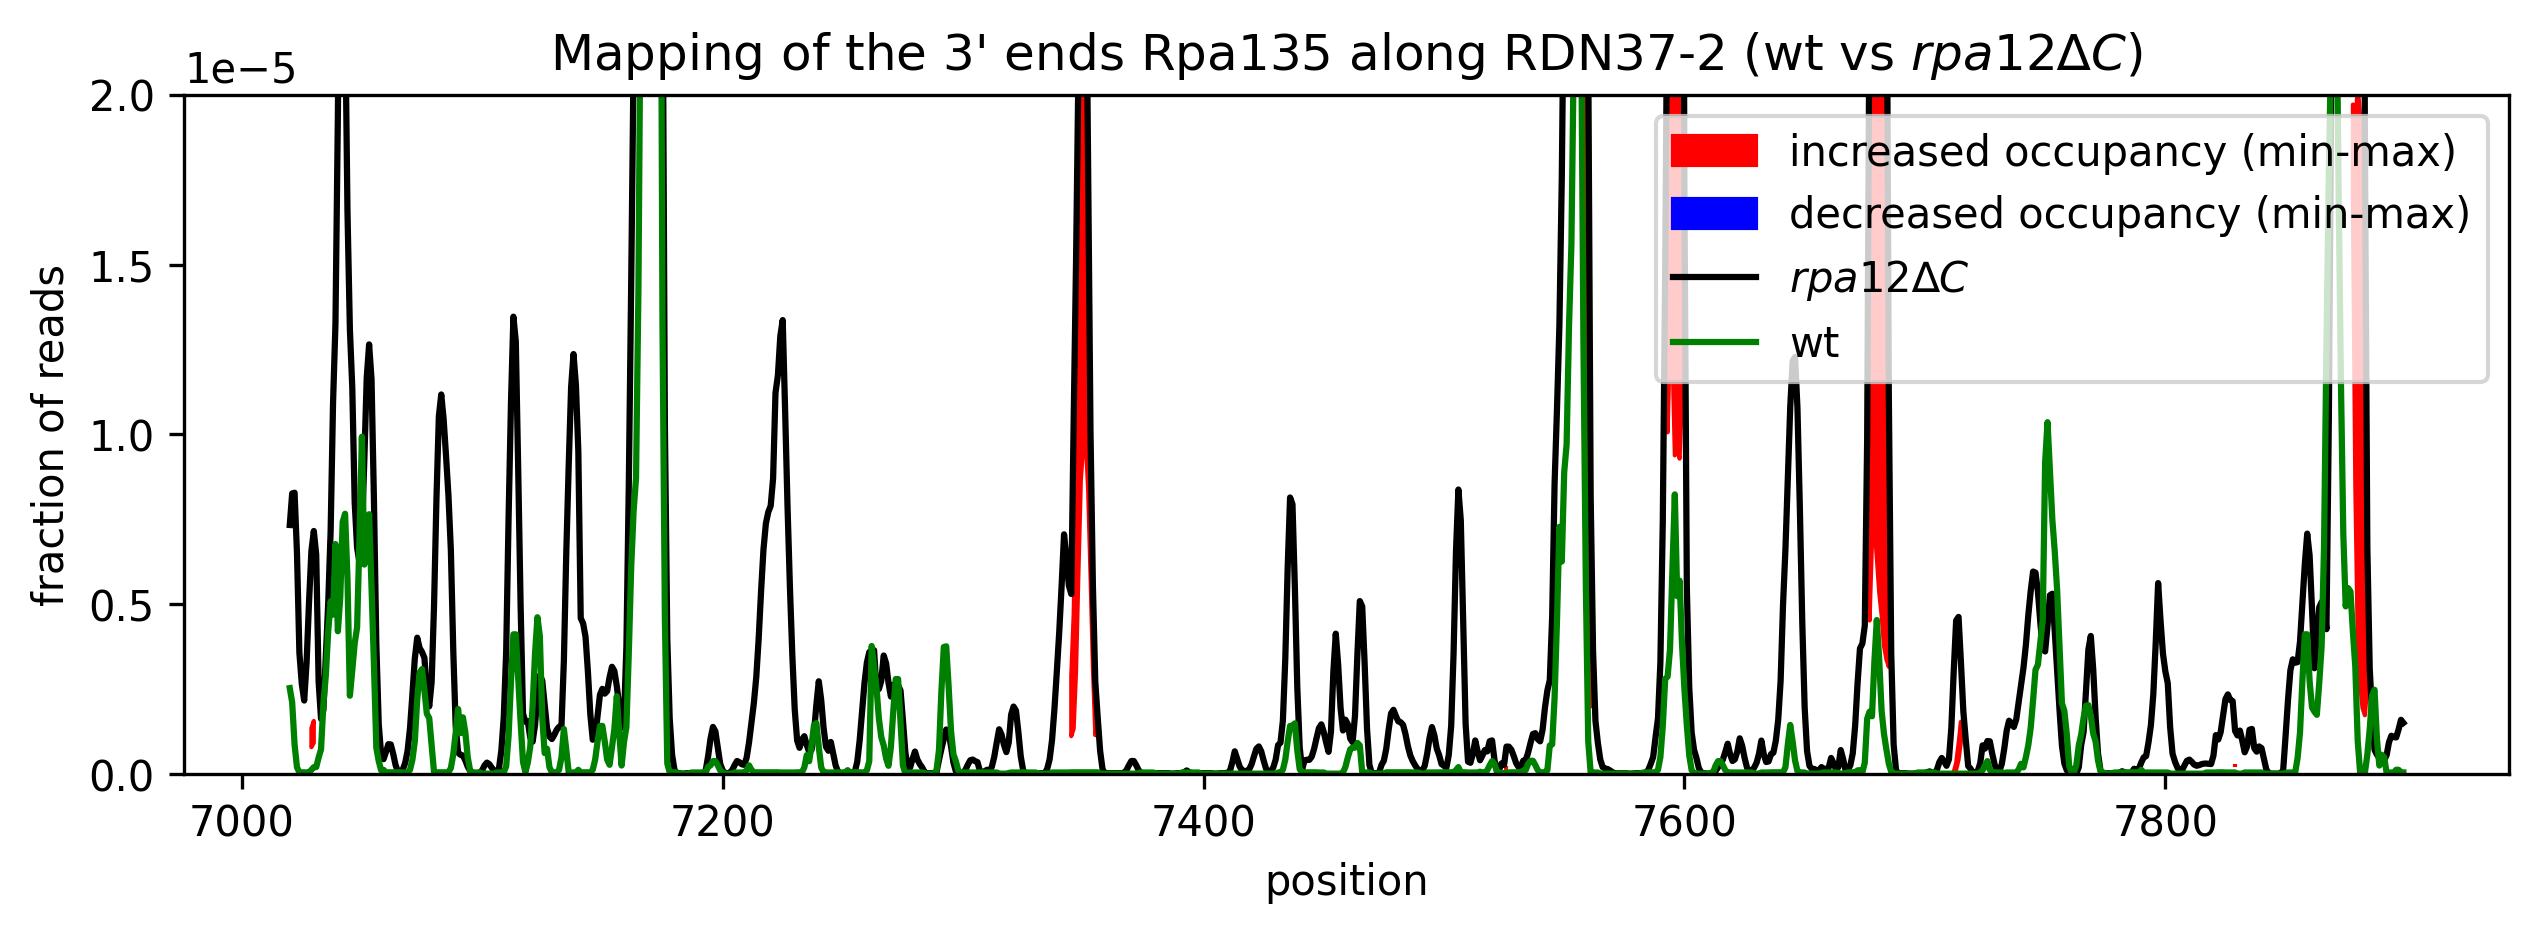

In [10]:
start=6600+1300
stop=7900+1300

tt.plotting.plot_diff(ref=df11_Rpa135_wt_3end, dataset=df12_Rpa135_rpa12d_3end,figsize=(10,3),label1="wt",label2="$\it{rpa12∆C}$",
                           title="Mapping of the 3' ends Rpa135 along RDN37-2 (wt vs $\it{rpa12∆C}$)",plot_ranges=False,
                           dpi=300,offset=1300, ylim=(0,0.0011),ranges='mm',
                           h_lines=[i-300 for i in cleavage_sites.values()],
                           start=start, stop=stop, fname='Fig_2E_v_minmin.png')

tt.plotting.plot_diff(ref=df11_Rpa135_wt_3end, dataset=df12_Rpa135_rpa12d_3end,figsize=(10,3),label1="wt",label2="$\it{rpa12∆C}$",
                           title="Mapping of the 3' ends Rpa135 along RDN37-2 (wt vs $\it{rpa12∆C}$)",plot_ranges=False,
                           dpi=300,offset=1300, ylim=(0,0.00002),ranges='mm',
                           start=1300+7020, stop=stop, fname='Fig_S2C_v_minmin.png')

/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_min'][differences_df['ref_above_exp'] > 0] = differences_df['exp_max']
/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:416: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_max'][differences_df['ref_above_exp'] > 0] = differences_df['ref_min']
/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in t

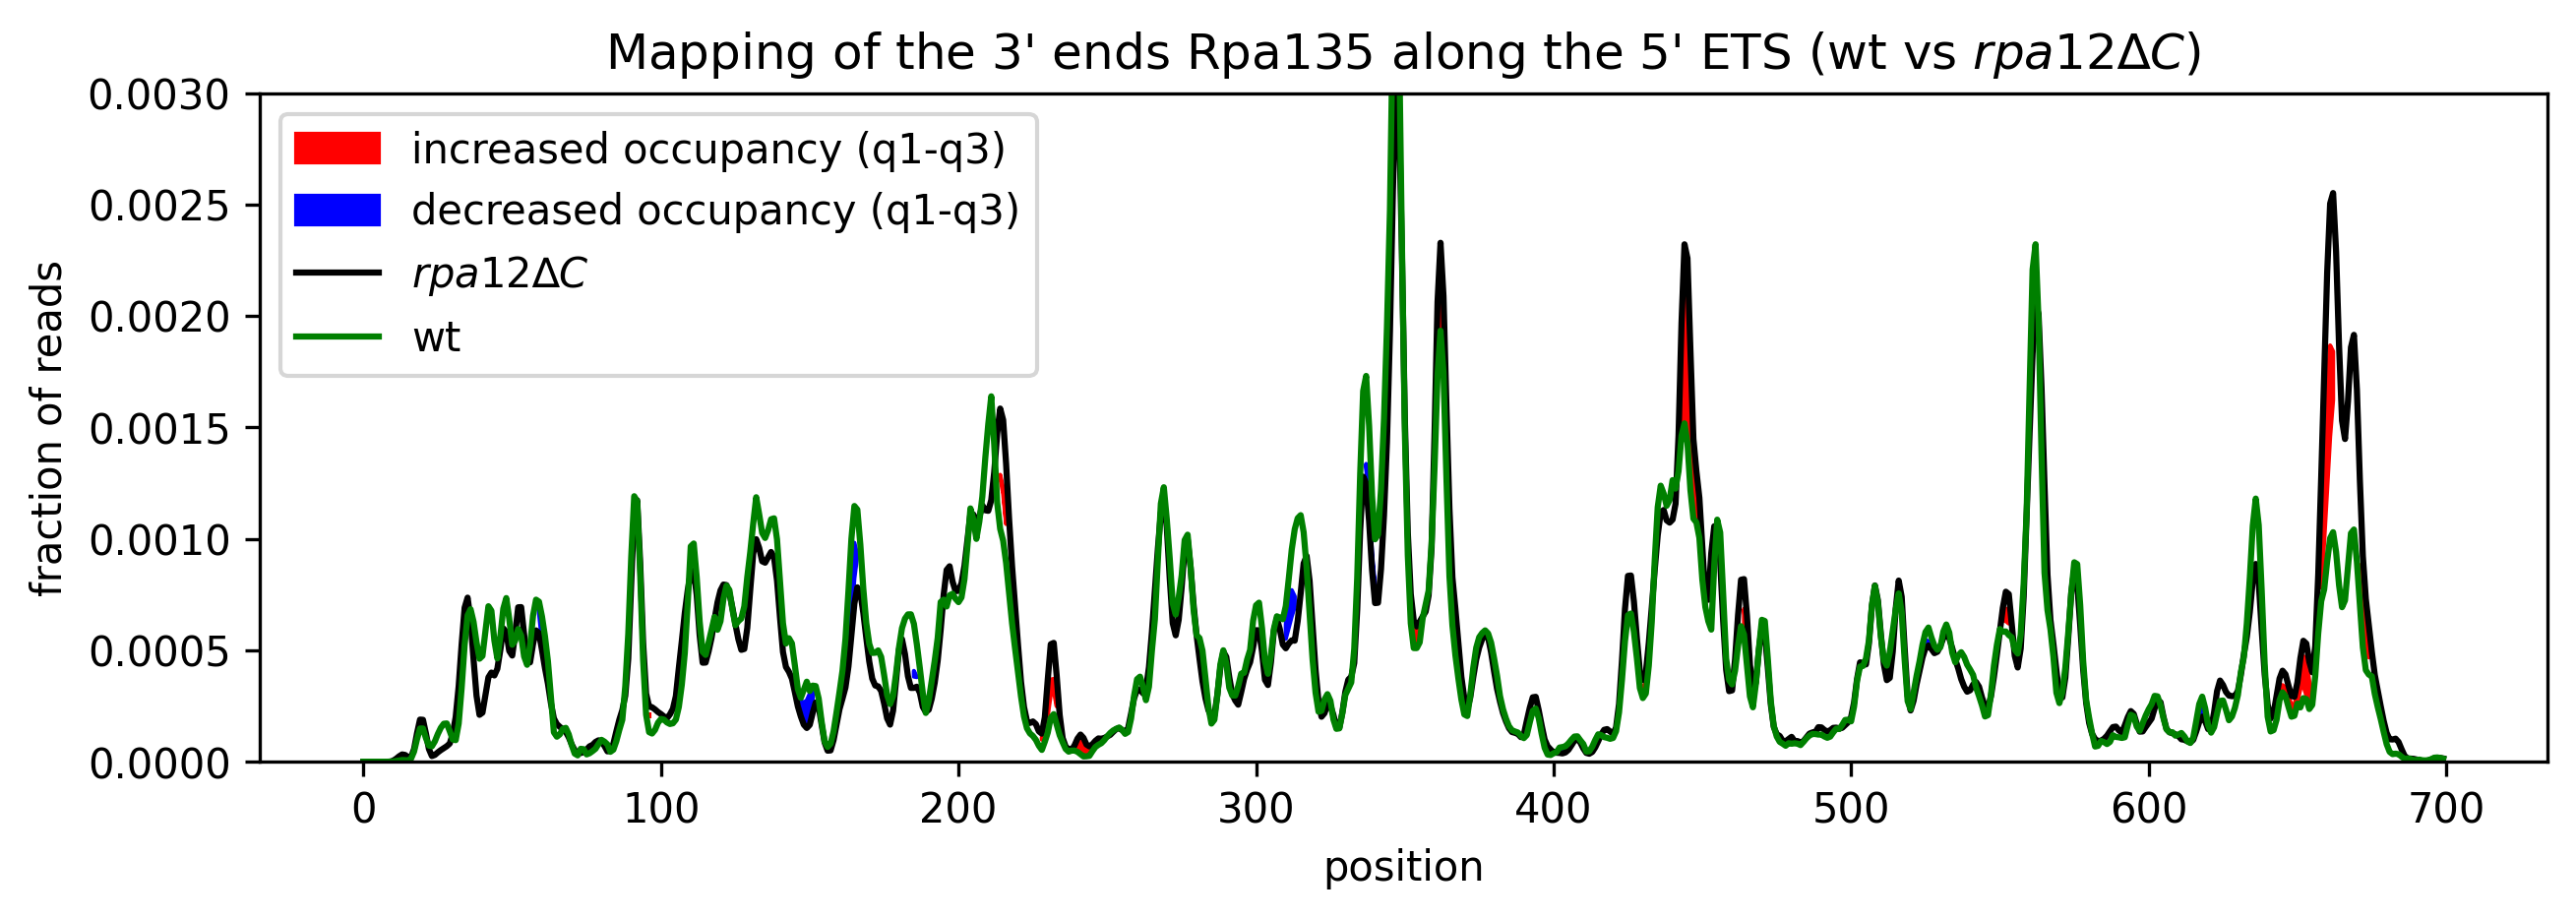

In [11]:
start = 0+1300
stop = 700+1300

tt.plotting.plot_diff(ref=df11_Rpa135_wt_3end, dataset=df12_Rpa135_rpa12d_3end,figsize=(10,3),label1="wt",label2="$\it{rpa12∆C}$",
                           title="Mapping of the 3' ends Rpa135 along the 5' ETS (wt vs $\it{rpa12∆C}$)",plot_ranges=False,
                           dpi=300,offset=1300, ylim=(0,0.003),ranges='qq',
                           start=start, stop=stop, fname='Fig_S4D.png')

There is too high variability in the data to compare size of the termination peak. More replicates would be needed

In [12]:
# check kinetics of RNAPI wt and Rpa12dC  - sums, or tilted cumsum

1.2847411585842409e-188
4.454669104429731e-46


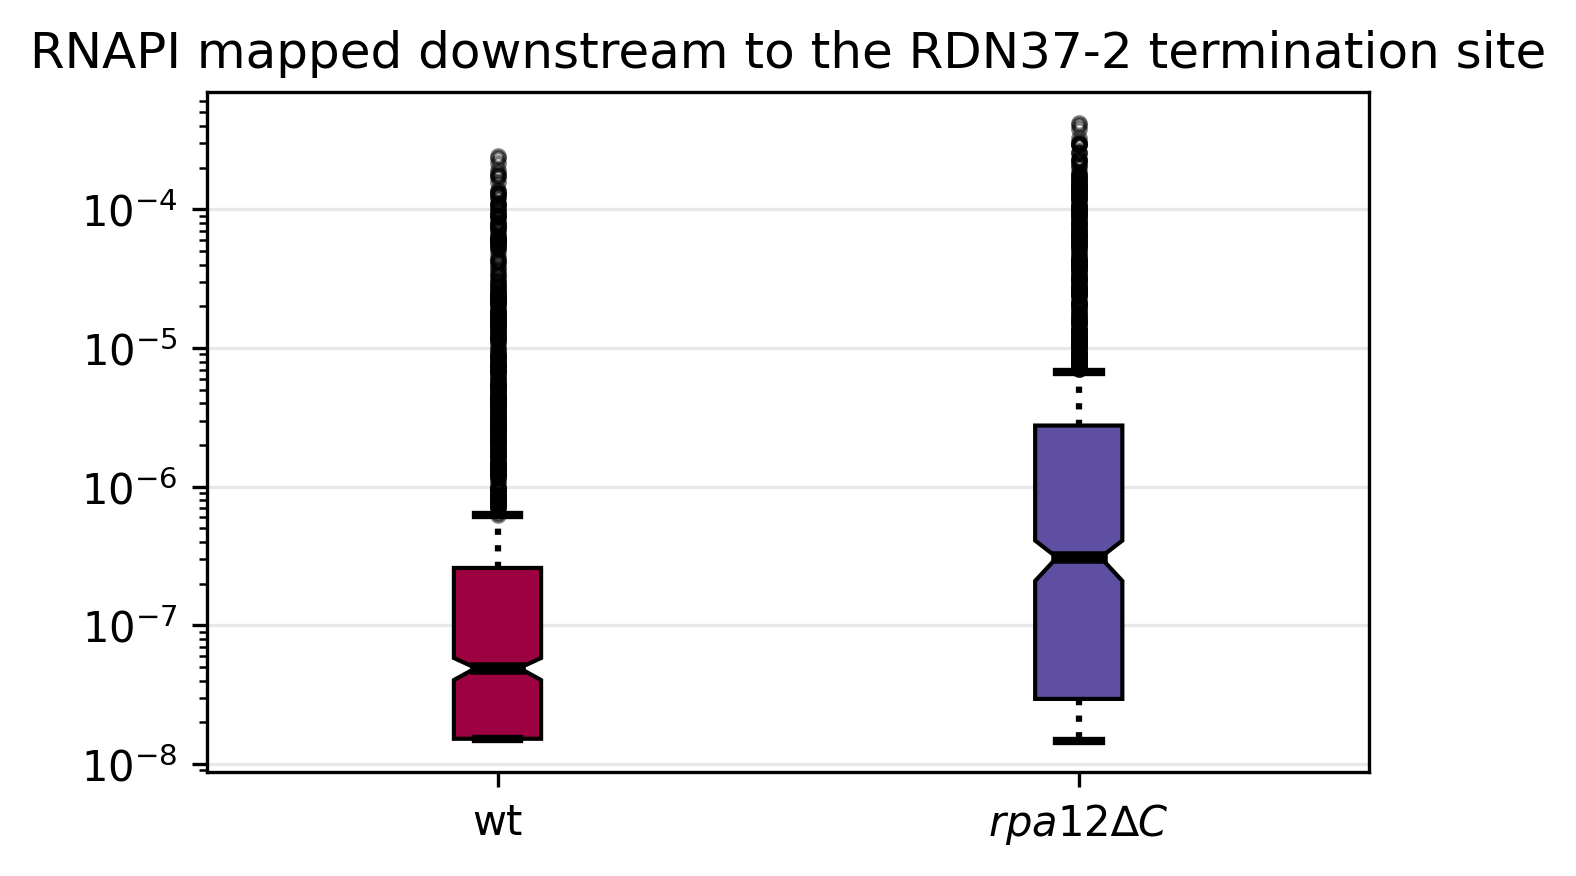

In [13]:
wt = df11_Rpa135_wt_3end[8100:] #60nt downstream the T1 site
a12dC = df12_Rpa135_rpa12d_3end[8100:]

data = [wt['median'].dropna().tolist(),a12dC['median'].dropna().tolist()]
labels=["wt","$\it{rpa12∆C}$"]

tt.plotting.boxplot1(data,labels,grid=True,log=True,figsize=(5,3),dpi=300,fname='Fig_2F.png',
                     title="RNAPI mapped downstream to the RDN37-2 termination site")

from scipy import stats

out = stats.wilcoxon(wt['median'].fillna(0.0),a12dC['median'].fillna(0.0))
print(out[1])
out = stats.ranksums(wt['median'].fillna(0.0),a12dC['median'].fillna(0.0))
print(out[1])

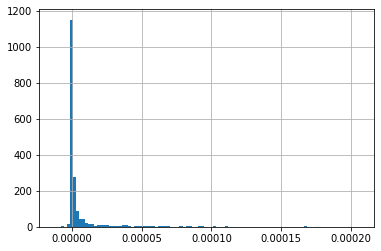

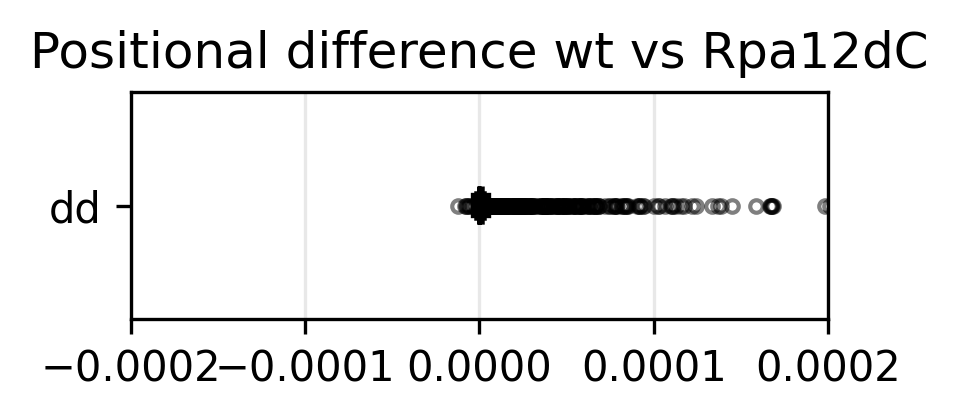

In [14]:
dd = a12dC['median']-wt['median']

dd.hist(bins=100)
plt.show()

tt.plotting.boxplot1(dd.dropna().tolist(),labels=["dd"],grid=True,figsize=(3,1),dpi=300,title="Positional difference wt vs Rpa12dC",vert=0,lim=(-0.0002,0.0002))

# Fig S Nsi1 role in termination

In [15]:
#preparing input files for nsi1d; merge reads for Xa and Xb files

for i in df01b_RDN372_datasets_3end.columns.values:
    if 'a_' in i:
        a = df01b_RDN372_datasets_3end[i]
        b = df01b_RDN372_datasets_3end[i.replace('a_','b_')]
        
        out = a.fillna(0)+b.fillna(0)
        
        if ( a.sum() + b.sum() ) == ( out.replace(0,np.nan).sum() ):
            print("correct: "+i)
            df01b_RDN372_datasets_3end[i.replace("a_","_")] = out
        else:
            print("error: "+i)

In [16]:
df11_Rpa135_wt_3end = tt.profiles.preprocess(df01b_RDN372_datasets_3end,
                                     let_in=['Rpa135HTP','wt'], 
                                     let_out=['Rpa12dC',"noUV"],stats=True)

#should I use 'C20P3-TT171005_Rpa135HTP_wt_none_x_PROFILE_3end'?

df12_Rpa135_nsi1d_3end = tt.profiles.preprocess(df01b_RDN372_datasets_3end,
                                     let_in=['Rpa135HTP','nsi1d','LP230802'],let_out=['Rpa12dC','W303'],stats=True)

Experiments: 
['EP190925_Rpa135HTP_wt_none_3_PROFILE_3end', 'LP230405_Rpa135HTP_wt_none_1_PROFILE_3end', 'C23P2-TT181022_Rpa135HTP_wt_none_2_PROFILE_3end', 'C18P2-TT170123_Rpa135HTP_wt_none_1_PROFILE_3end', 'LP221214_Rpa135HTP_wt_none_2_PROFILE_3end', 'LP230802_Rpa135HTP_wt_none_1_PROFILE_3end']
Experiments: 
['LP230802_Rpa135HTP_nsi1d_none_1_PROFILE_3end', 'LP230802_Rpa135HTP_nsi1d_none_2_PROFILE_3end']


remove LP230405 from raw

/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_min'][differences_df['ref_above_exp'] > 0] = differences_df['exp_max']
/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:416: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_max'][differences_df['ref_above_exp'] > 0] = differences_df['ref_min']
/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in t

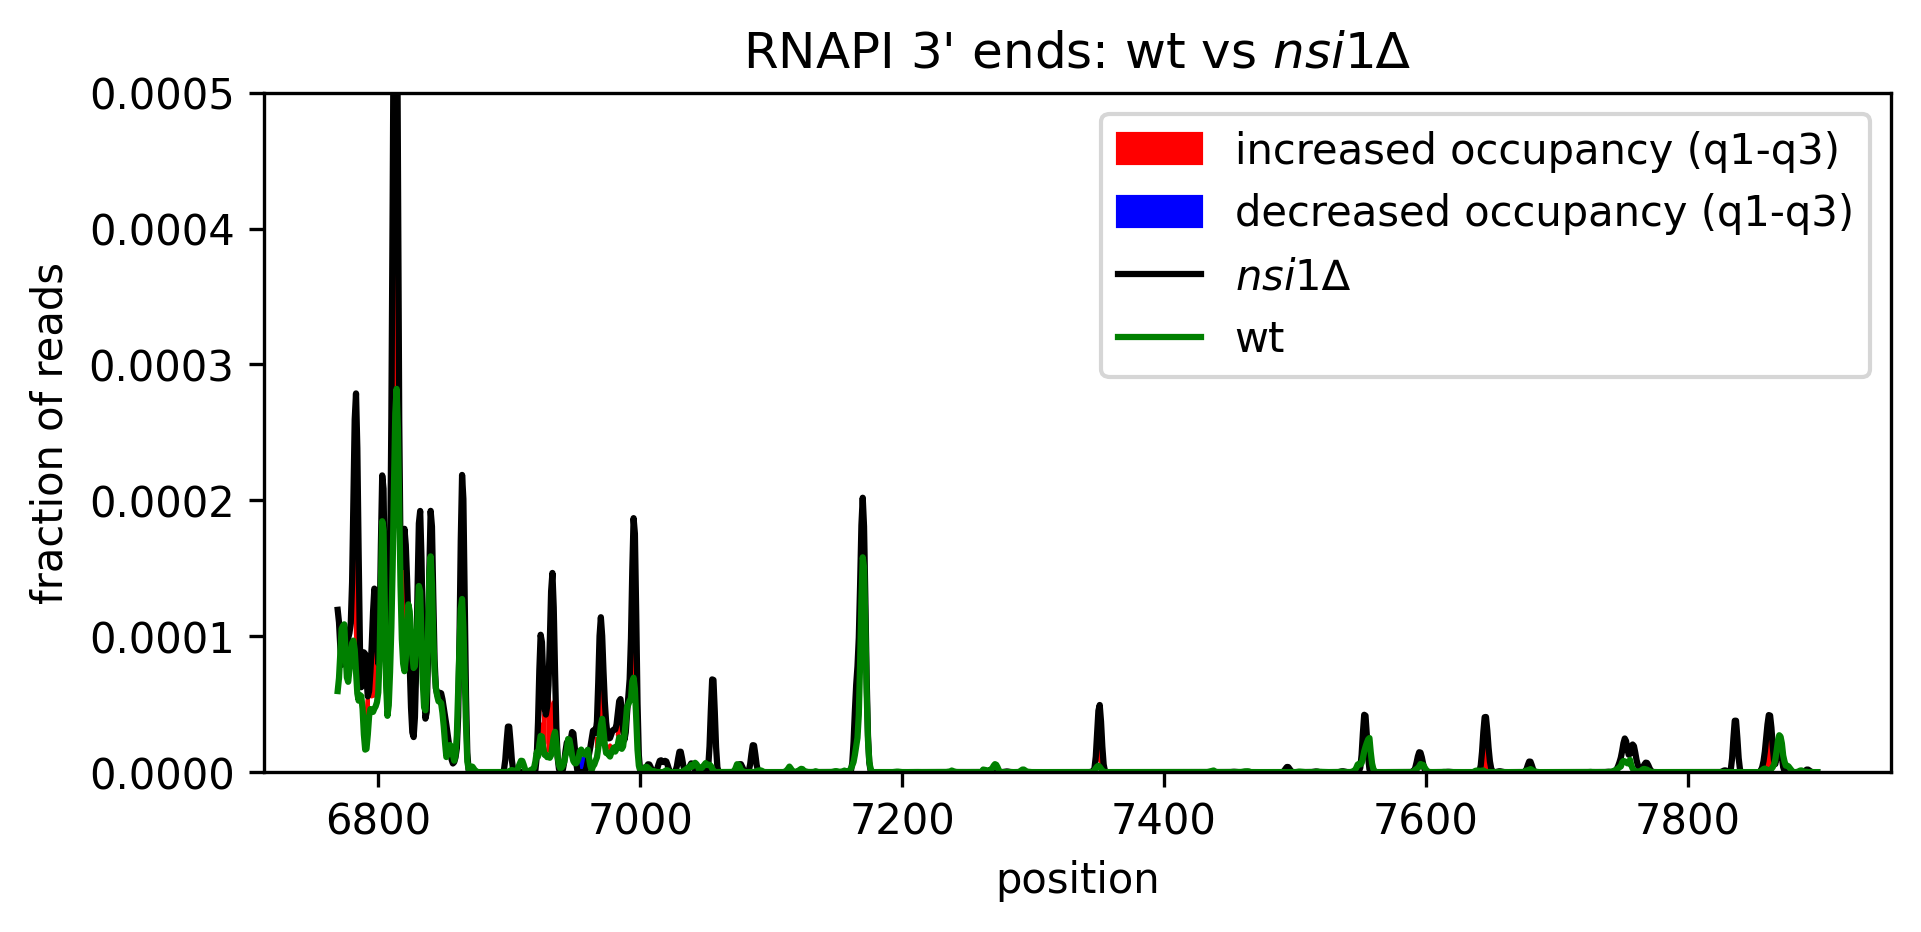

In [17]:
start=6739+30+1300
stop=7900+1300

tt.plotting.plot_diff(ref=df11_Rpa135_wt_3end, dataset=df12_Rpa135_nsi1d_3end,figsize=(7,3),label1="wt",label2="$\it{nsi1∆}$",
                           title="RNAPI 3' ends: wt vs $\it{nsi1∆}$",plot_ranges=False,
                           dpi=300,offset=1300, ylim=(0,0.0005),ranges='qq',
                           h_lines=[i-300 for i in cleavage_sites.values()],
                           start=start, stop=stop, fname='Fig_S2G_nsi1d.png')

# Role of Nsi1 in RNAPI termination in Rpa12dC mutant

In [18]:
df13_Rpa135_Rpa12dC_3end = tt.profiles.preprocess(df01b_RDN372_datasets_3end,
                                     let_in=['Rpa135HTP','Rpa12dC'], 
                                     let_out=["noUV",'wt','nsi1d','C23',"a_",'b_'],stats=True)

#should I use 'C20P3-TT171005_Rpa135HTP_wt_none_x_PROFILE_3end'?
df14_Rpa135_Rpa12dC_nsi1d_3end = tt.profiles.preprocess(df01b_RDN372_datasets_3end,
                                     let_in=['Rpa135HTP','nsi1d','Rpa12dC','LP230802'],let_out=['wt',"a_",'b_'],stats=True)

Experiments: 
['LP230405_Rpa135HTP_Rpa12dC_none_1_PROFILE_3end', 'LP221214_Rpa135HTP_Rpa12dC_none_3_PROFILE_3end', 'EP190925_Rpa135HTP_Rpa12dC_none_2_PROFILE_3end', 'LP221214_Rpa135HTP_Rpa12dC_none_4_PROFILE_3end', 'LP230802_Rpa135HTP_Rpa12dC_none_1_PROFILE_3end']
Experiments: 
['LP230802_Rpa135HTP_Rpa12dC-nsi1d_none_1_PROFILE_3end', 'LP230802_Rpa135HTP_Rpa12dC-nsi1d_none_2_PROFILE_3end']


/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_min'][differences_df['ref_above_exp'] > 0] = differences_df['exp_max']
/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:416: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_max'][differences_df['ref_above_exp'] > 0] = differences_df['ref_min']
/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in t

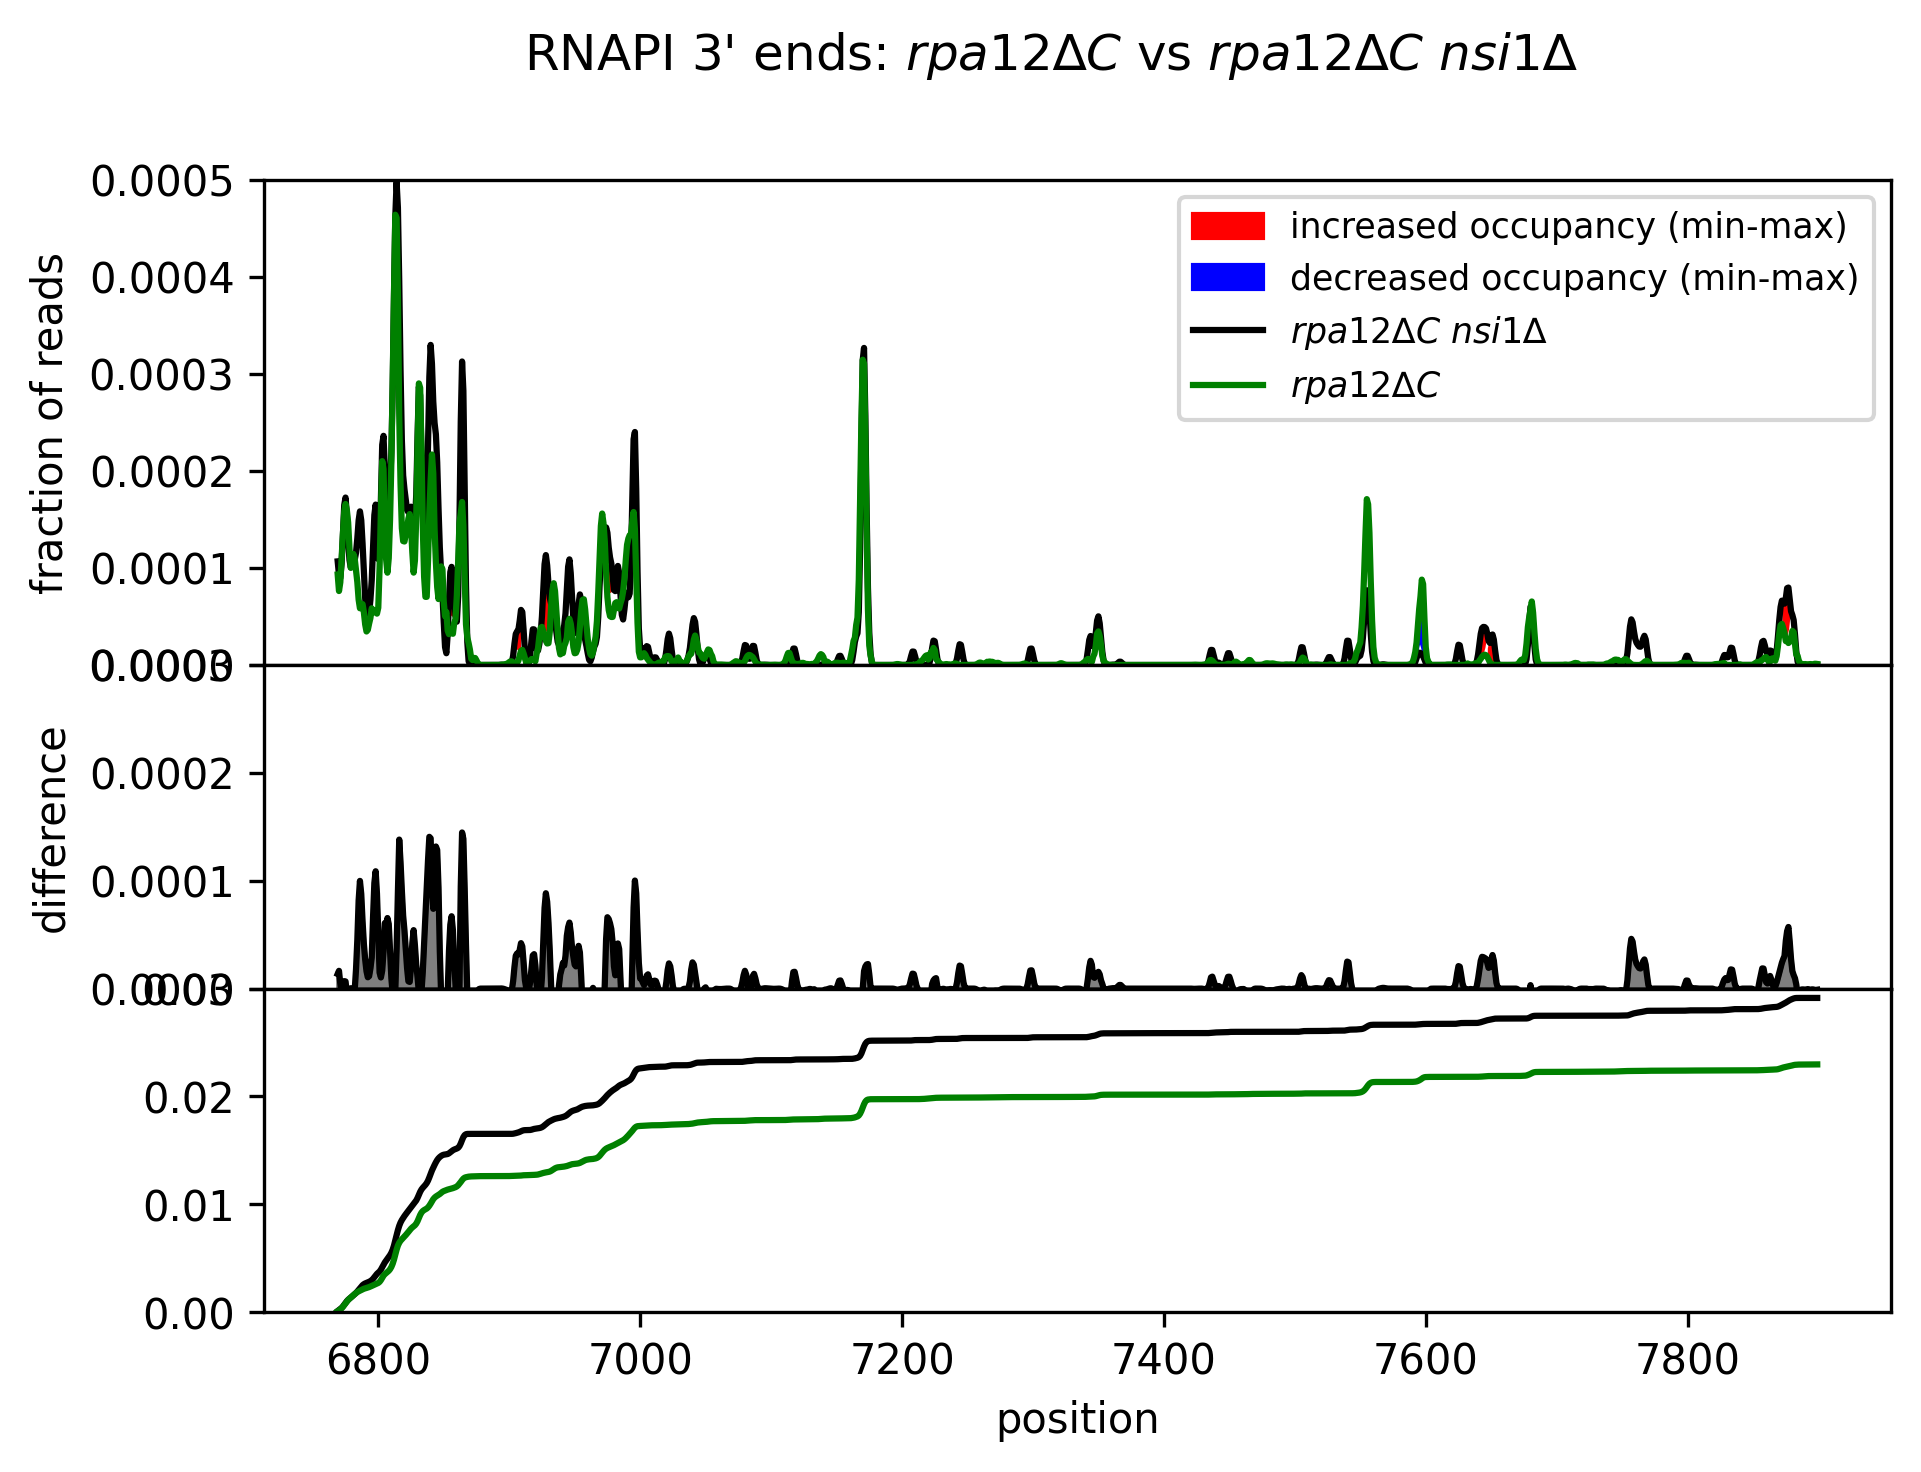

In [19]:
start=6739+30+1300
stop=7900+1300


plot_diff3(ref=df13_Rpa135_Rpa12dC_3end, dataset=df14_Rpa135_Rpa12dC_nsi1d_3end,figsize=(7,5),label1="$\it{rpa12∆C}$",label2="$\it{rpa12∆C}$ $\it{nsi1∆}$",
                           title="RNAPI 3' ends: $\it{rpa12∆C}$ vs $\it{rpa12∆C}$ $\it{nsi1∆}$",plot_ranges=False,
                           dpi=300,offset=1300, ylim=(0,0.0005),ranges='mm',
                           h_lines=[i-300 for i in cleavage_sites.values()],
                           start=start, stop=stop, fname='Fig_S2H_nsi1d_effect_in_Rpc12dC.png')

# Role of Rpa12dC in RNAPI termination in nsi1d

Experiments: 
['LP230802_Rpa135HTP_nsi1d_none_1_PROFILE_3end', 'LP230802_Rpa135HTP_nsi1d_none_2_PROFILE_3end']
Experiments: 
['LP230802_Rpa135HTP_Rpa12dC-nsi1d_none_1_PROFILE_3end', 'LP230802_Rpa135HTP_Rpa12dC-nsi1d_none_2_PROFILE_3end']


/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_min'][differences_df['ref_above_exp'] > 0] = differences_df['exp_max']
/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:416: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_max'][differences_df['ref_above_exp'] > 0] = differences_df['ref_min']
/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in t

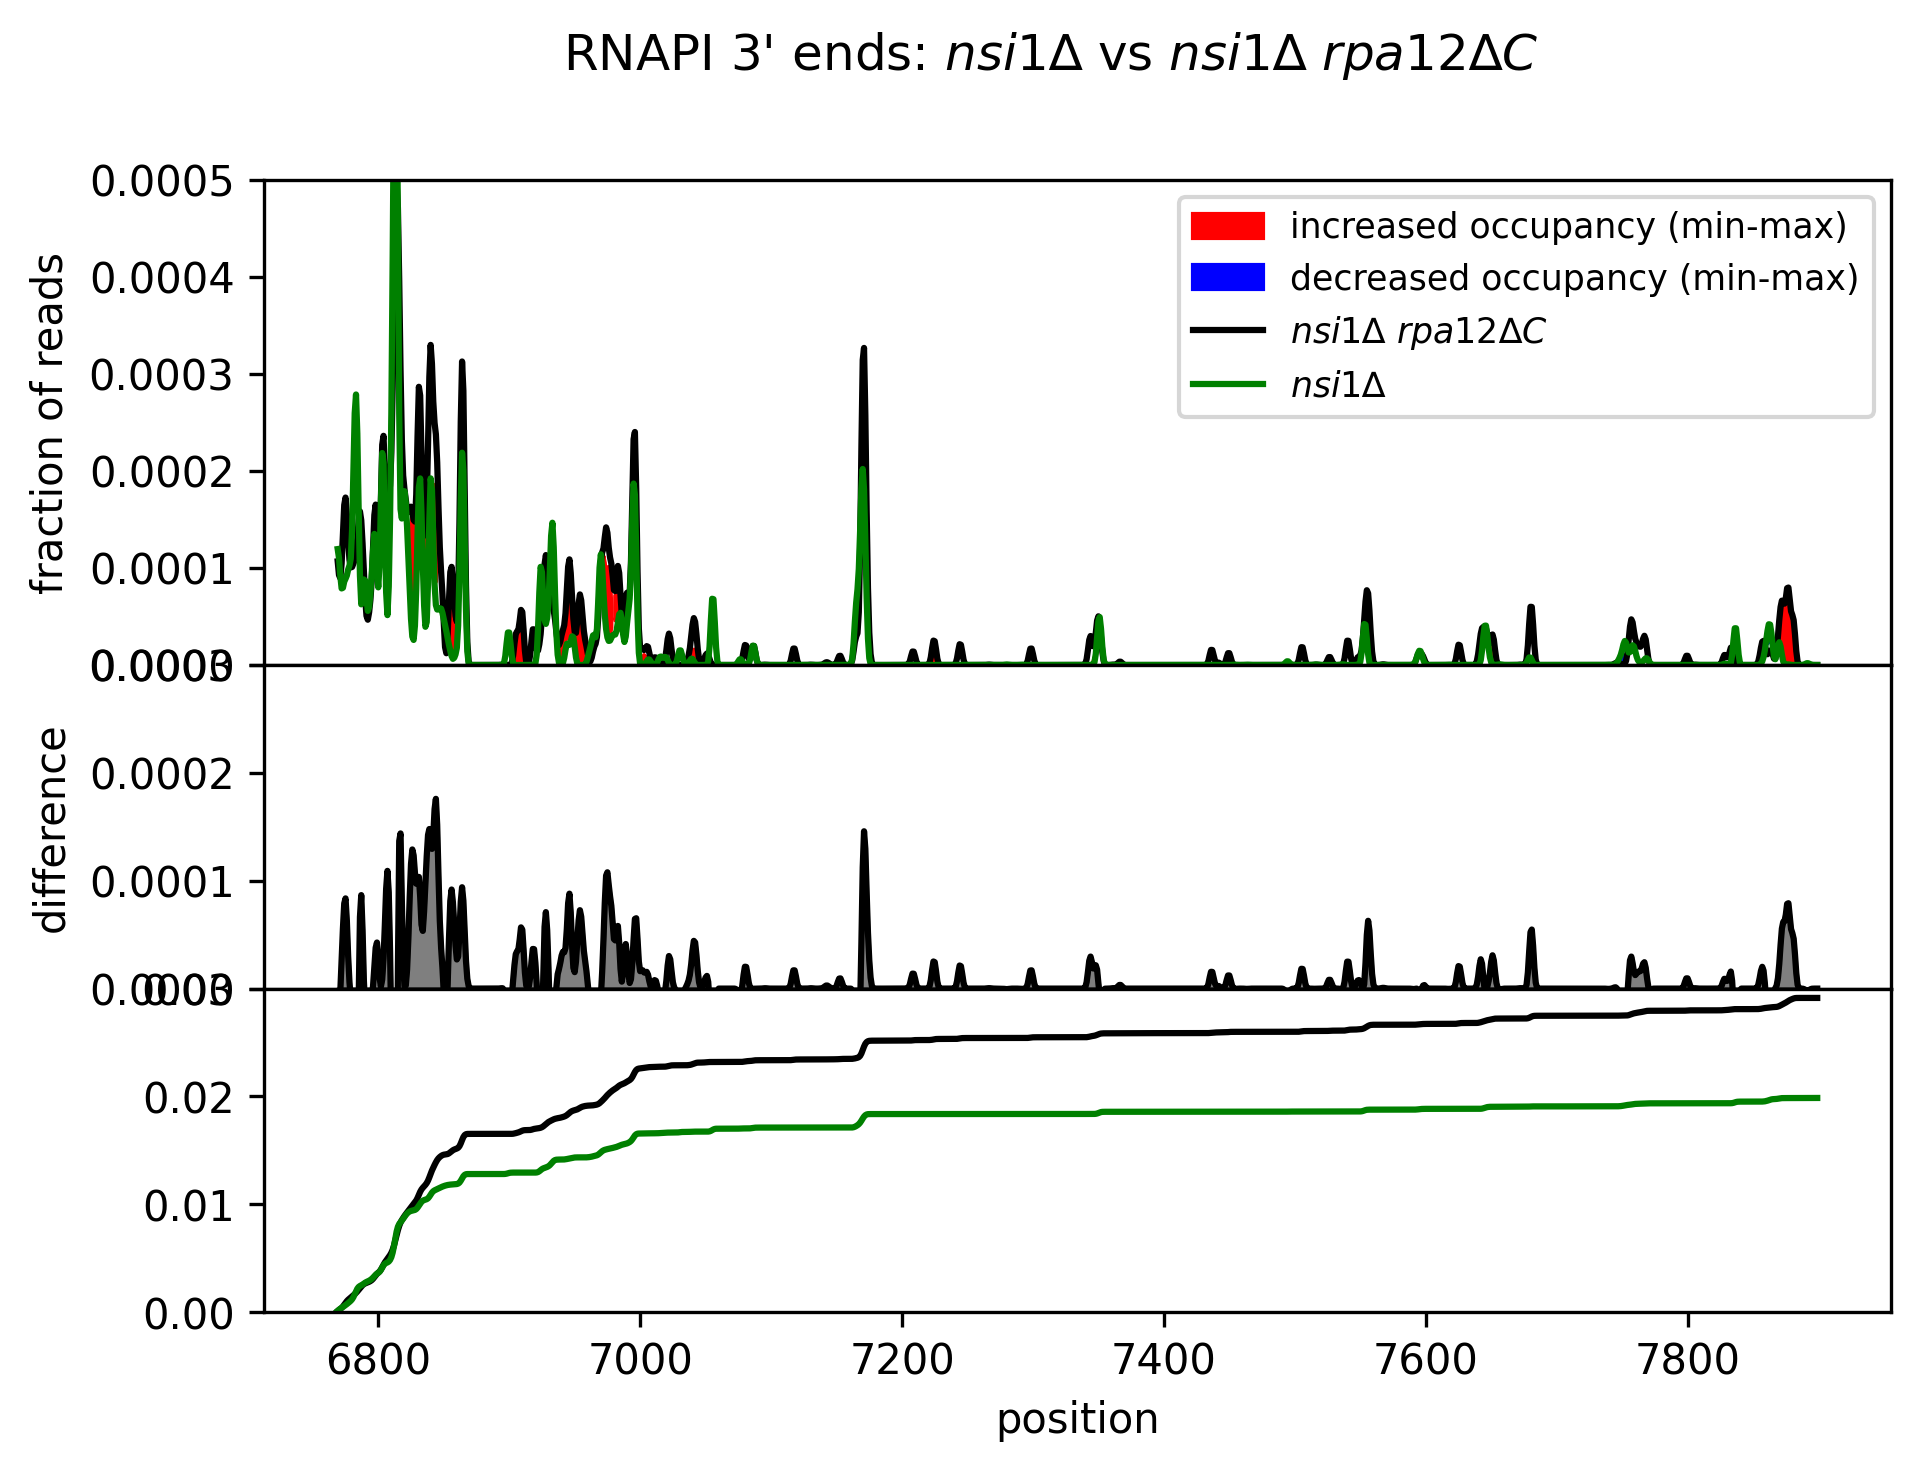

In [20]:
a = tt.profiles.preprocess(df01b_RDN372_datasets_3end,let_in=['LP230802','Rpa135HTP_nsi1d_none'],let_out=["a_",'b_'], stats=True)
b = tt.profiles.preprocess(df01b_RDN372_datasets_3end,let_in=['LP230802','Rpa135HTP_Rpa12dC-nsi1d_none'],let_out=["a_",'b_'], stats=True)

start=6739+30+1300
stop=7900+1300
plot_diff3(ref=a, dataset=b,figsize=(7,5),label1='$\it{nsi1∆}$',label2='$\it{nsi1∆}$ $\it{rpa12∆C}$',
                           title="RNAPI 3' ends: $\it{nsi1∆}$ vs $\it{nsi1∆}$ $\it{rpa12∆C}$",plot_ranges=False,
                           dpi=300,offset=1300, ylim=(0,0.0005),ranges='mm',
                           h_lines=[i-300 for i in cleavage_sites.values()],
                           start=start, stop=stop, fname='Fig_S2I_Rpa12dC_effect_in_nsi1d_background.png')